<a href="https://colab.research.google.com/github/LakshmiSrivastava/DataAnalysisAndMachineLearning/blob/main/Copy_of_Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Delhivery is India’s largest fully integrated logistics provider. They are building  the operating system for commerce, with an aim to create world-class infrastructure with highest quality and technology capabilities.
It established in 2011, and till now  successfully fulfilled over 2 billion orders across India. Delhivery has warehouses and service centers in every state, servicing over 18,500 pin codes. Some of the service centers are automated and provide delivery 24 X7.

The business model of Delhivery is asset-light where infrastructure and vehicles are leased which significantly decreases operational risk and aids in faster growth.
It provides an integrated platform of end-to-end logistics management including parcel delivery, part truckload, full truckload, and warehousing.

DataseChallenges Faced by Delhivery are:
1. Inability to Manage Multiple Customers
2. Delivering consignments at the given time is not made, could lead to customer dissatisfaction, hence.
3. Poor Visibility on the Courier Delivery Operations
4. Dependency on Human Resources
5. Keeping Customers Updated
6. Delivering Goods Without Any Damage

To Manage it need analysis on the given points:
High Delivery Cost,
Managing courier operations, like order segregation, order allocation, selecting the right delivery vehicle, assigning drivers, planning delivery routes.

The Delhivery Dataset given to us is from 12th sep to 3 oct so the chart shows more trips in sep than oct. Convenient route carting was choosen rather than full load Truck.
There are total 14817 trips which is the primary key of  route is segmented from source address to destination address. In every segment destination of last address would be source of the next.

Column profiling:

data - tells whether the data is testing or training data, eg- test, training

trip_creation_time - Timestamp of trip creation eg. 2018-09-20 02:35:36.476840

route_schedule_uuid - Unique Id for a particular route schedule,

route_type - Transportation type only two type , eg. carting, FTL
  FTL -Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
  Carting- Handling system consisting of small vehicles (carts)

trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

source_center - Source ID of trip origin eg. IND388121AAA

source_name - Source Name of trip origin eg. ANAND_VUNAGAR_DC(GUJRAT)

destination_cente - Destination ID EG. IND3888620AAB

destination_name  -Destination Name eg. Khambhat_MotvDPP_D(Gujrat)

od_start_time - Trip start time eg. 2018-09-25 02:35:36.476785

od_end_time -  Trip end time eg. 2018-08-20 02:35:36.476456

start_scan_to_end_scan - Time taken to deliver from source to destination 86.0

is_cutoff - Unknown field
cutoff_factor - Unknown field
cutoff_timestamp - Unknown field

actual_distance_to_destination -  Distance in Kms between source and destination warehouse eg. 10.4357889

actual_time - Actual time taken to complete the delivery (Cumulative) eg. 14

osrm_time - An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative) eg. 11.0

osrm_distance - An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)eg. 11.965

factor  - Unknown field
segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

segment_factor – Unknown field

Problems :

1. Basic data cleaning and exploration:
2. Handle missing values in the data.
3. Analyze the structure of the data.
4. Try merging the rows using the hint mentioned above.
5. Build some features to prepare the data for actual analysis.
  a. Extract features from the below fields:
  b. Destination Name: Split and extract features out of destination. City-place-code (State)
  c. Source Name: Split and extract features out of destination. City-place-code (State)
  d. Trip_creation_time: Extract features like month, year and day etc
6. In-depth analysis and feature engineering:
7. Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
8. Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.
9. Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
10. Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
11. Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
12. Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
13. Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis
14. Handle the outliers using the IQR method.
15. Do one-hot encoding of categorical variables (like route_type)
Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.


Importing Numpy for numerical analysis, Pandas for working in Dataset and estimation of probabilit, Matplotlib and Seaborn for Data visualization and better insight. Importing bernaulli, binom, geom and poisson from scipy.stats for discrete data and expon, norm, lognorm for continuous data for EDA.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as san
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, norm, kstest,pearsonr, f_oneway,chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

**Loading dataset and observing data in dataset**

In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

Basic data cleaning and exploration

In [ ]:
df.tail(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [ ]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.columns


Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

Insight: 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp','factor', 'segment_factor' features are unknown and insignificant for analysis.
       So need to remove it from dataset.

In [ ]:
df.shape

(144867, 24)

In [ ]:
df1=df.copy()
df1.head(15)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


Insight: There are multiple rows for a single trip_uuid, which is a unique id given to a perticular trip and a trip may include different source and destination. So merging is required on the basis of all three features for unique and better granulerity.

In [ ]:
df1.groupby('trip_uuid').agg({"trip_uuid":"count"})

,trip_uuid
trip_uuid,
trip-153671041653548748,39
trip-153671042288605164,9
trip-153671043369099517,89
trip-153671046011330457,2
trip-153671052974046625,7
...,...
trip-153861095625827784,7
trip-153861104386292051,2
trip-153861106442901555,6


Insight: Multiple rows are associated with single trip_uuid, which is an unique ID for each trip. like trip-153671041653548748	has 39 entries.

Recommendation:  
1. Grouping of data on the basis of trip_uuid
2. Chech for duplicate data for eliminate redundency


**Data cleaning and exploration**

Features - 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp','factor', 'segment_factor' are unknown field so need to delete them, if defination information is not given, might be secret or such views are not impact the analysis.

In [ ]:
df1.drop(labels=['is_cutoff', 'cutoff_factor', 'cutoff_timestamp','factor', 'segment_factor'], axis=1,inplace=True)

**Merging of rows and aggregation of fields**





In [ ]:
df1_tripSourceDest= df1.groupby(['trip_uuid', 'source_center', 'destination_center']).agg({'data' :'first', 'osrm_time':'max', 'osrm_distance': 'max','trip_creation_time': 'first', 'source_name':'first', 'destination_name':'last', 'route_schedule_uuid':'first', 'route_type':'first', 'od_start_time':'min', 'od_end_time' : 'max', 'start_scan_to_end_scan': 'max', 'segment_actual_time':'sum', 'segment_osrm_distance':'sum', 'segment_osrm_time':'sum', 'actual_distance_to_destination':'max', 'actual_time':'max'}).sort_values(by=['trip_uuid','od_start_time'], ascending=True).reset_index()

In [ ]:
df1_tripSourceDest.head()

,trip_uuid,source_center,destination_center,data,osrm_time,osrm_distance,trip_creation_time,source_name,destination_name,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,segment_actual_time,segment_osrm_distance,segment_osrm_time,actual_distance_to_destination,actual_time
0,trip-153671041653548748,IND462022AAA,IND209304AAA,training,394.0,544.8027,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,820.0,649.8528,474.0,440.973689,830.0
1,trip-153671041653548748,IND209304AAA,IND000000ACB,training,349.0,446.5496,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,728.0,670.6205,534.0,383.759164,732.0
2,trip-153671042288605164,IND572101AAA,IND561203AAB,training,42.0,56.9116,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,95.0,55.9899,39.0,48.542890,96.0
3,trip-153671042288605164,IND561203AAB,IND562101AAA,training,26.0,28.1994,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,46.0,28.1995,26.0,24.644021,47.0
4,trip-153671043369099517,IND562132AAA,IND000000ACB,training,1529.0,2090.8743,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,2700.0,2227.5270,1710.0,1689.964663,2736.0


In [ ]:
df1_tripSourceDest.shape

(26368, 19)

In [ ]:
df1_tripWise=df1_tripSourceDest.groupby('trip_uuid').agg({'data':'first', 'osrm_time':'sum', 'osrm_distance': 'sum','trip_creation_time': 'first', 'source_center':'first','destination_center':'last', 'source_name':'first', 'destination_name':'last', 'route_schedule_uuid':'first', 'route_type':'first', 'od_start_time':'min', 'od_end_time' : 'max', 'start_scan_to_end_scan': 'sum', 'segment_actual_time':'sum', 'segment_osrm_distance':'sum','segment_osrm_time':'sum', 'actual_distance_to_destination':'sum', 'actual_time':'sum'}).reset_index()

In [ ]:
df1_tripWise.head()

,trip_uuid,data,osrm_time,osrm_distance,trip_creation_time,source_center,destination_center,source_name,destination_name,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,segment_actual_time,segment_osrm_distance,segment_osrm_time,actual_distance_to_destination,actual_time
0,trip-153671041653548748,training,743.0,991.3523,2018-09-12 00:00:16.535741,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1548.0,1320.4733,1008.0,824.732854,1562.0
1,trip-153671042288605164,training,68.0,85.1110,2018-09-12 00:00:22.886430,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,141.0,84.1894,65.0,73.186911,143.0
2,trip-153671043369099517,training,1741.0,2372.0852,2018-09-12 00:00:33.691250,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3308.0,2545.2678,1941.0,1932.273969,3347.0
3,trip-153671046011330457,training,15.0,19.6800,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,19.8766,16.0,17.175274,59.0
4,trip-153671052974046625,training,117.0,146.7918,2018-09-12 00:02:09.740725,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,340.0,146.7919,115.0,127.448500,341.0


In [ ]:
df1_tripWise.shape

(14817, 19)

**Missing value treatment and Outlier treatment**

In [ ]:
df1_tripWise.isna().sum()/len(df1_tripWise)

trip_uuid                         0.000000
data                              0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
trip_creation_time                0.000000
source_center                     0.000000
destination_center                0.000000
source_name                       0.000675
destination_name                  0.000540
route_schedule_uuid               0.000000
route_type                        0.000000
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
segment_actual_time               0.000000
segment_osrm_distance             0.000000
segment_osrm_time                 0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
dtype: float64

In [ ]:
df1_tripWise.fillna({'source_name':'Anonymous', 'destination_name':'Anonymous'}, inplace=True)

In [ ]:
df1_tripWise.isna().sum()/len(df1_tripWise)

trip_uuid                         0.0
data                              0.0
osrm_time                         0.0
osrm_distance                     0.0
trip_creation_time                0.0
source_center                     0.0
destination_center                0.0
source_name                       0.0
destination_name                  0.0
route_schedule_uuid               0.0
route_type                        0.0
od_start_time                     0.0
od_end_time                       0.0
start_scan_to_end_scan            0.0
segment_actual_time               0.0
segment_osrm_distance             0.0
segment_osrm_time                 0.0
actual_distance_to_destination    0.0
actual_time                       0.0
dtype: float64

In [ ]:
df1_tripWise.duplicated().sum()

0

Insight: There is not any duplicate row.

In [ ]:
df1_tripWise.describe(include=object).T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
data,14817,2,training,10654
trip_creation_time,14817,14817,2018-09-12 00:00:16.535741,1
source_center,14817,868,IND000000ACB,948
destination_center,14817,956,IND000000ACB,813
source_name,14817,868,Gurgaon_Bilaspur_HB (Haryana),948
destination_name,14817,951,Gurgaon_Bilaspur_HB (Haryana),813
route_schedule_uuid,14817,1504,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
route_type,14817,2,Carting,8908
od_start_time,14817,14817,2018-09-12 00:00:16.535741,1


Insight:
1. trip_uuid has each unique value for each row.
2. data and route_type has 2 values, training data is 10654 in 14817 and Carting is more conveinient way than FTL with 8908 entries in 14817.

In [ ]:
df1_tripWise.describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,14817.0,162.071202,272.304633,6.000000,29.00000,60.000000,169.000000,2032.000000
osrm_distance,14817.0,205.101357,370.780010,9.072900,30.94180,65.882600,209.300500,2840.081000
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.00000,280.000000,637.000000,7898.000000
segment_actual_time,14817.0,353.892286,556.247965,9.000000,66.00000,147.000000,367.000000,6230.000000
segment_osrm_distance,14817.0,223.201161,416.628374,9.072900,32.65450,70.154400,218.802400,3523.632400
segment_osrm_time,14817.0,180.949787,314.542047,6.000000,31.00000,65.000000,185.000000,2564.000000
actual_distance_to_destination,14817.0,164.683253,305.561572,9.002461,22.86003,48.499937,164.853324,2187.483994
actual_time,14817.0,357.143754,561.396157,9.000000,67.00000,149.000000,370.000000,6265.000000


Insight: High standard deviation values are shown,
1. that means values are generally far from the mean.
2. more chances of outlier

Recommendation:
**Outlier detection and careful handling is required.**

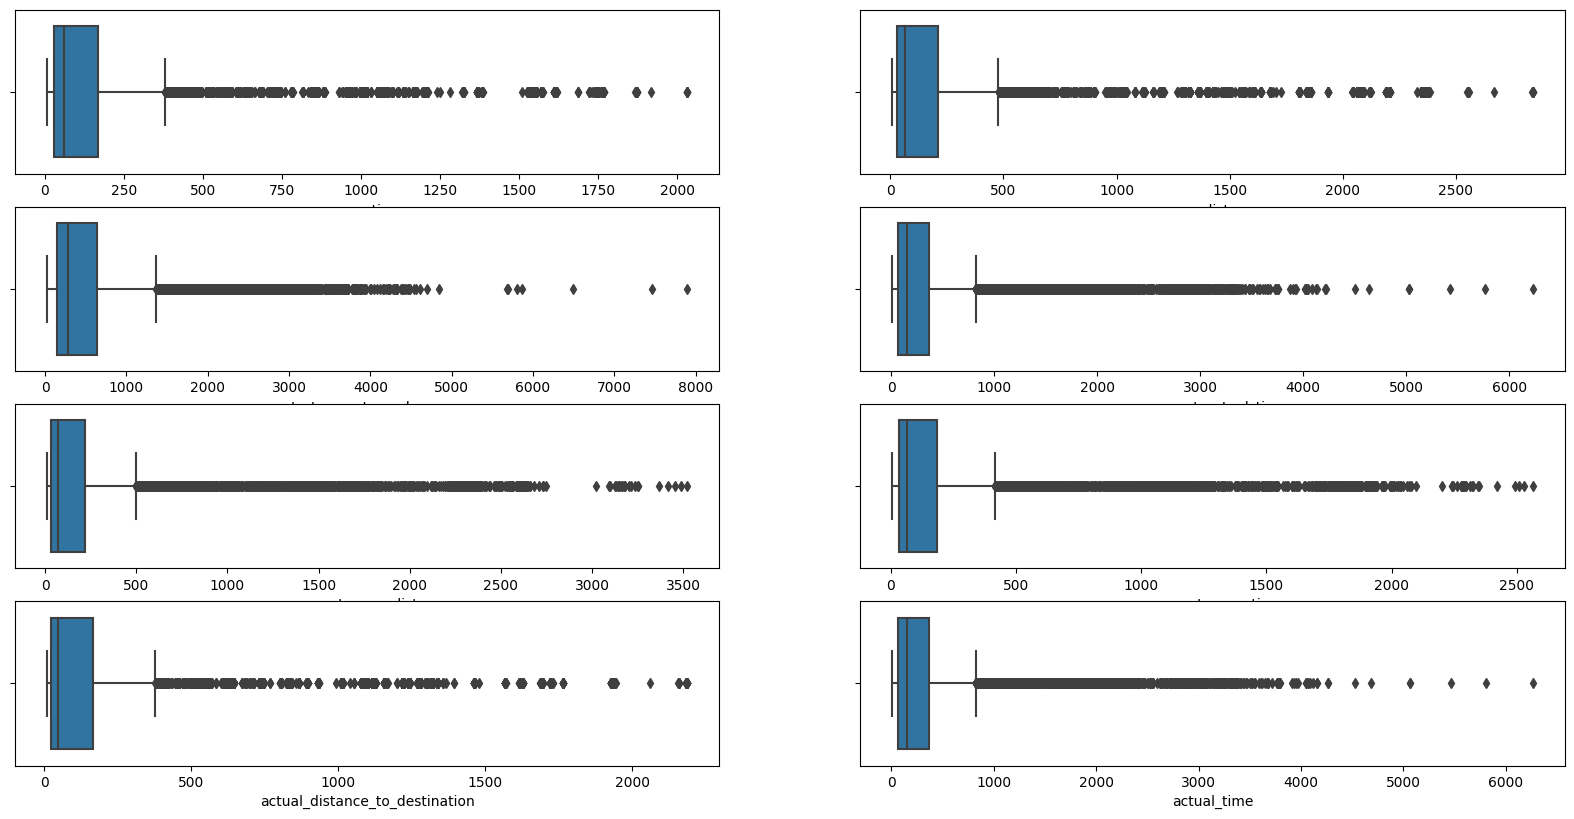

In [ ]:

cols=['osrm_time','osrm_distance','start_scan_to_end_scan', 'segment_actual_time', 'segment_osrm_distance','segment_osrm_time', 'actual_distance_to_destination', 'actual_time' ]
f,a=plt.subplots(nrows=4, ncols=2, figsize=(20,4))
i=0
f.subplots_adjust(top=2)
for row in range(4):
  for col in range(2):
    san.boxplot(data=df1_tripWise, x=cols[i],ax=a[row,col])
    i+=1
plt.show()


In [ ]:
cols=['osrm_time','osrm_distance','start_scan_to_end_scan', 'segment_actual_time', 'segment_osrm_distance','segment_osrm_time', 'actual_distance_to_destination', 'actual_time' ]
for i in range(len(cols)):
  print("outlier in  " +cols[i] )
  IQR=np.percentile(df1_tripWise[cols[i]],75)-np.percentile(df1_tripWise[cols[i]],25)
  print("IQR : ",IQR)
  Q1=np.percentile(df1_tripWise[cols[i]],25)
  print('Q1 : ',Q1)
  Q3=np.percentile(df1_tripWise[cols[i]],75)
  print('Q3 : ', Q3)
  upperlimit=Q3+(IQR*1.5)
  print("upperlimit : ",upperlimit)
  lowerlimit=Q1-(IQR*1.5)
  print("lowerlimit : ",lowerlimit)
  outlier=df1_tripWise[(df1_tripWise[cols[i]]>upperlimit) |(df1_tripWise[cols[i]]<lowerlimit)]
  print("outlier in" +cols[i] +": ",len(outlier))
  print("*********************************************")
  i+=1

outlier in  osrm_time
IQR :  140.0
Q1 :  29.0
Q3 :  169.0
upperlimit :  379.0
lowerlimit :  -181.0
outlier inosrm_time:  1516
*********************************************
outlier in  osrm_distance
IQR :  178.3587
Q1 :  30.9418
Q3 :  209.3005
upperlimit :  476.83855
lowerlimit :  -236.59625
outlier inosrm_distance:  1526
*********************************************
outlier in  start_scan_to_end_scan
IQR :  488.0
Q1 :  149.0
Q3 :  637.0
upperlimit :  1369.0
lowerlimit :  -583.0
outlier instart_scan_to_end_scan:  1267
*********************************************
outlier in  segment_actual_time
IQR :  301.0
Q1 :  66.0
Q3 :  367.0
upperlimit :  818.5
lowerlimit :  -385.5
outlier insegment_actual_time:  1643
*********************************************
outlier in  segment_osrm_distance
IQR :  186.1479
Q1 :  32.6545
Q3 :  218.8024
upperlimit :  498.02425000000005
lowerlimit :  -246.56735000000003
outlier insegment_osrm_distance:  1548
*********************************************
outlier 

Insight: There are a big numbers of outliers in each columns like 1643 datapoints are outlier in actual_time columns among  14817 trips, after all in the sense of routes, trip_time can fluctuate by many reasons such as strike, hazards or any such inccidents.

In [ ]:
cols=['osrm_time','osrm_distance','start_scan_to_end_scan', 'segment_actual_time', 'segment_osrm_distance','segment_osrm_time', 'actual_distance_to_destination', 'actual_time' ]
df1_tripWise = df1_tripWise[-((df1_tripWise[cols] < (Q1 - 1.5 * IQR)) | (df1_tripWise[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df1_tripWise = df1_tripWise.reset_index(drop=True)
df1_tripWise

,trip_uuid,data,osrm_time,osrm_distance,trip_creation_time,source_center,destination_center,source_name,destination_name,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,segment_actual_time,segment_osrm_distance,segment_osrm_time,actual_distance_to_destination,actual_time
0,trip-153671042288605164,training,68.0,85.1110,2018-09-12 00:00:22.886430,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,141.0,84.1894,65.0,73.186911,143.0
1,trip-153671046011330457,training,15.0,19.6800,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,19.8766,16.0,17.175274,59.0
2,trip-153671052974046625,training,117.0,146.7918,2018-09-12 00:02:09.740725,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,340.0,146.7919,115.0,127.448500,341.0
3,trip-153671055416136166,training,23.0,28.0647,2018-09-12 00:02:34.161600,IND600116AAB,IND602105AAB,Chennai_Porur_DPC (Tamil Nadu),Chennai_Sriperumbudur_Dc (Tamil Nadu),thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,60.0,28.0647,23.0,24.597048,61.0
4,trip-153671066201138152,training,13.0,12.0184,2018-09-12 00:04:22.011653,IND600044AAD,IND600048AAA,Chennai_Chrompet_DPC (Tamil Nadu),Chennai_Vandalur_Dc (Tamil Nadu),thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,24.0,12.0184,13.0,9.100510,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11966,trip-153861095625827784,test,62.0,73.4630,2018-10-03 23:55:56.258533,IND160002AAC,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,82.0,64.8551,62.0,57.762332,83.0
11967,trip-153861104386292051,test,12.0,16.0882,2018-10-03 23:57:23.863155,IND121004AAB,IND121004AAA,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,21.0,16.0883,11.0,15.513784,21.0
11968,trip-153861106442901555,test,54.0,63.2841,2018-10-03 23:57:44.429324,IND209304AAA,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,281.0,104.8866,88.0,38.684839,282.0
11969,trip-153861115439069069,test,184.0,177.6635,2018-10-03 23:59:14.390954,IND627005AAA,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,258.0,223.5324,221.0,134.723836,264.0


In [ ]:
df1_tripWise.nunique()

trip_uuid                         11971
data                                  2
osrm_time                           362
osrm_distance                     11892
trip_creation_time                11971
source_center                       820
destination_center                  911
source_name                         820
destination_name                    908
route_schedule_uuid                1358
route_type                            2
od_start_time                     11971
od_end_time                       11971
start_scan_to_end_scan              797
segment_actual_time                 664
segment_osrm_distance             11909
segment_osrm_time                   402
actual_distance_to_destination    11955
actual_time                         661
trip_creation_day                     7
trip_creation_month                   2
source_city                         642
source_place                        629
source_state                         28
source_code                         744


**Analyze the structure of the data**

In [ ]:
df1_tripWise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11971 entries, 0 to 11970
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       11971 non-null  object        
 1   data                            11971 non-null  object        
 2   osrm_time                       11971 non-null  float64       
 3   osrm_distance                   11971 non-null  float64       
 4   trip_creation_time              11971 non-null  datetime64[ns]
 5   source_center                   11971 non-null  object        
 6   destination_center              11971 non-null  object        
 7   source_name                     11971 non-null  object        
 8   destination_name                11971 non-null  object        
 9   route_schedule_uuid             11971 non-null  object        
 10  route_type                      11971 non-null  object        
 11  od

Insight :

Categorial data:'data', 'trip_creation_time', 'route_schedule_uuid',    'route_type','trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time'.

Numerical data:  'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'.

Recomendation : Year, month and day slot can futher extract from 'trip_creation_time', 'od_start_time', 'od_end_time' datetime for analysis and use as categorical, similarly temp, atemp, humidity can categorised by deviding in bins and season, holiday,workingday, weather should change in categorical data.

**Conversion of object datatype to datetime**



In [ ]:
cat_col=['trip_creation_time', 'od_start_time', 'od_end_time' ]
for cols in cat_col:
  df1_tripWise[cols]=pd.to_datetime(df1_tripWise[cols])


In [ ]:
df1_tripWise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11971 entries, 0 to 11970
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       11971 non-null  object        
 1   data                            11971 non-null  object        
 2   osrm_time                       11971 non-null  float64       
 3   osrm_distance                   11971 non-null  float64       
 4   trip_creation_time              11971 non-null  datetime64[ns]
 5   source_center                   11971 non-null  object        
 6   destination_center              11971 non-null  object        
 7   source_name                     11971 non-null  object        
 8   destination_name                11971 non-null  object        
 9   route_schedule_uuid             11971 non-null  object        
 10  route_type                      11971 non-null  object        
 11  od

Duration of dataset

In [ ]:
first_day=df1_tripWise['trip_creation_time'].min()
end_day=df1_tripWise['trip_creation_time'].max()
print(f"The first day of the given dataset for analysis is {first_day} and the last day is {end_day}")

The first day of the given dataset for analysis is 2018-09-12 00:00:22.886430 and the last day is 2018-10-03 23:59:42.701692


Insight: Given dataset is of very sort period of time sep 12 2018 to Oct 3 2018.

Building some features to prepare the data for actual analysis. Extracting features:

**Feature creation**

Two new features will create on the basis of day and months as year is only one 2018 for whole dataset.

In [ ]:

df1_tripWise["trip_creation_day"] = (df1_tripWise["trip_creation_time"].dt.day_name())
df1_tripWise["trip_creation_month"] = (df1_tripWise["trip_creation_time"].dt.month_name())

In [ ]:
df1_tripWise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11971 entries, 0 to 11970
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       11971 non-null  object        
 1   data                            11971 non-null  object        
 2   osrm_time                       11971 non-null  float64       
 3   osrm_distance                   11971 non-null  float64       
 4   trip_creation_time              11971 non-null  datetime64[ns]
 5   source_center                   11971 non-null  object        
 6   destination_center              11971 non-null  object        
 7   source_name                     11971 non-null  object        
 8   destination_name                11971 non-null  object        
 9   route_schedule_uuid             11971 non-null  object        
 10  route_type                      11971 non-null  object        
 11  od

Split and extract features city and state out of source_name and destination_name from the format City_place_code(state)

In [ ]:
df1_tripWise['source_city']= df1_tripWise['source_name'].str.split("_", n=1, expand=True)[0]
df1_tripWise["source_place"]=df1_tripWise["source_name"].str.split("_", n=2, expand=True)[1]
df1_tripWise["source_state"]=df1_tripWise["source_name"].str.split(" ", n=1, expand=True)[1].str.replace("(","").str.replace(")", "")
df1_tripWise["source_code"]=df1_tripWise["source_center"].apply(lambda x: x[3:9])

<ipython-input-29-1d2daa5d044d>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1_tripWise["source_state"]=df1_tripWise["source_name"].str.split(" ", n=1, expand=True)[1].str.replace("(","").str.replace(")", "")


In [ ]:
df1_tripWise['destination_city']= df1_tripWise['destination_name'].str.split("_", n=1, expand=True)[0]
df1_tripWise["destination_place"]=df1_tripWise["destination_name"].str.split("_", n=2, expand=True)[1]
df1_tripWise["destination_state"] = df1_tripWise["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")
df1_tripWise["destination_code"] =df1_tripWise["destination_center"].apply(lambda x : x[3:9])
df1_tripWise['source_ccs']=df1_tripWise['source_city']+' '+df1_tripWise['source_code']+' '+df1_tripWise['source_state']
df1_tripWise['destination_ccs']=df1_tripWise['destination_city']+' '+df1_tripWise['destination_code']+' '+df1_tripWise['destination_state']

<ipython-input-67-d1f323f57b71>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1_tripWise["destination_state"] = df1_tripWise["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")


In [ ]:
df1_tripWise["time_taken"]=(df1_tripWise["od_end_time"]-df1_tripWise["od_start_time"])/pd.Timedelta(minutes=1)

In [ ]:
df1_tripWise.head(5)

,trip_uuid,data,osrm_time,osrm_distance,trip_creation_time,source_center,destination_center,source_name,destination_name,route_schedule_uuid,...,trip_creation_month,source_city,source_place,source_state,source_code,destination_city,destination_place,destination_state,destination_code,time_taken
0,trip-153671041653548748,training,743.0,991.3523,2018-09-12 00:00:16.535741,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,...,September,Bhopal,Trnsport,Madhya Pradesh,462022,Gurgaon,Bilaspur,Haryana,000000,2260.109800
1,trip-153671042288605164,training,68.0,85.1110,2018-09-12 00:00:22.886430,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,...,September,Tumkur,Veersagr,Karnataka,572101,Chikblapur,ShntiSgr,Karnataka,562101,181.611874
2,trip-153671043369099517,training,1741.0,2372.0852,2018-09-12 00:00:33.691250,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,...,September,Bangalore,Nelmngla,Karnataka,562132,Chandigarh,Mehmdpur,Punjab,160002,3934.362520
3,trip-153671046011330457,training,15.0,19.6800,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,...,September,Mumbai Hub (Maharashtra),None,Hub Maharashtra,400072,Mumbai,MiraRd,Maharashtra,401104,100.494935
4,trip-153671052974046625,training,117.0,146.7918,2018-09-12 00:02:09.740725,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,...,September,Bellary,Dc (Karnataka),Karnataka,583101,Bellary,Dc (Karnataka),Karnataka,583101,718.349042


In [ ]:
df1_tripWise.nunique()

trip_uuid                         11971
data                                  2
osrm_time                           362
osrm_distance                     11892
trip_creation_time                11971
source_center                       820
destination_center                  911
source_name                         820
destination_name                    908
route_schedule_uuid                1358
route_type                            2
od_start_time                     11971
od_end_time                       11971
start_scan_to_end_scan              797
segment_actual_time                 664
segment_osrm_distance             11909
segment_osrm_time                   402
actual_distance_to_destination    11955
actual_time                         661
trip_creation_day                     7
trip_creation_month                   2
source_city                         643
source_place                        629
source_state                         48
source_code                         744


In [ ]:
df1_tripWise["source_state"].unique()

array(['Madhya Pradesh', 'Karnataka', 'Hub Maharashtra', 'Tamil Nadu',
       'Layout PC Karnataka', 'Gujarat', 'Delhi', 'Maharashtra',
       'Haryana', 'Telangana', 'Rajasthan', 'Uttar Pradesh', 'Assam',
       'West Bengal', 'Andhra Pradesh', 'Punjab', 'Goa',
       'City Madhya Pradesh', 'Jharkhand', 'Pondicherry', 'Orissa',
       'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'MP Nagar Madhya Pradesh', 'Pashan DPC Maharashtra',
       '02_DPC Uttar Pradesh', 'Vadgaon Sheri DPC Maharashtra',
       'Arunachal Pradesh', 'Bihar', 'Chandigarh', 'Road Punjab',
       'DC Rajasthan', 'Chhattisgarh', 'Antop Hill Maharashtra',
       'West _Dc Maharashtra', 'Alipore_DPC West Bengal',
       'Avenue_DPC West Bengal', 'Dadra and Nagar Haveli',
       'Nagar Uttar Pradesh', 'Jammu & Kashmir',
       'Rahatani DPC Maharashtra', 'Mizoram', 'Nagaland',
       'Mahim Maharashtra', None, 'Nagar_DC Rajasthan',
       'Kothanur_L Karnataka', 'Mandakni Madhya Pradesh',
       'DC Maharashtra']

Insight: some states has prefix, which lead to ambiguites in trend and prediction.So need to remove it.

In [ ]:
df1_tripWise["destination_state"].unique()

array(['Haryana', 'Karnataka', 'Punjab', 'Maharashtra', 'Tamil Nadu',
       'Layout PC Karnataka', 'Gujarat', 'Delhi',
       'Rahatani DPC Maharashtra', 'Telangana', 'Rajasthan',
       'Madhya Pradesh', 'Assam', 'Uttar Pradesh', 'West Bengal',
       'Andhra Pradesh', 'Dadra and Nagar Haveli', 'Orissa', 'Bihar',
       'Jharkhand', 'Pondicherry', '02_DPC Uttar Pradesh', 'Goa',
       'Chandigarh', 'Uttarakhand', 'Hub Maharashtra', 'Himachal Pradesh',
       'Kerala', 'Nagar Uttar Pradesh', 'Pashan DPC Maharashtra',
       'Arunachal Pradesh', 'Avenue_DPC West Bengal',
       'West _Dc Maharashtra', 'Alipore_DPC West Bengal',
       'Vadgaon Sheri DPC Maharashtra', 'Mizoram', 'Chhattisgarh',
       'MP Nagar Madhya Pradesh', 'Goa Goa', 'Antop Hill Maharashtra',
       'Nagaland', 'Meghalaya', 'Delhi Delhi', 'Jammu & Kashmir',
       'Balaji Nagar Maharashtra', 'Tripura', None, 'City Madhya Pradesh',
       'Mandakni Madhya Pradesh', 'Kothanur_L Karnataka',
       'West_Dc Maharashtra

In [ ]:
df1_tripWise["source_state"]=df1_tripWise["source_state"].replace({"Hub Maharashtra":"Maharashtra", "Nagar_DC Rajasthan":"Rajasthan",'Alipore_DPC West Bengal':'West Bengal', 'Vadgaon Sheri DPC Maharashtra':"Maharashtra", '02_DPC Uttar Pradesh':'Uttar Pradesh','MP Nagar Madhya Pradesh':'Madhya Pradesh','Road Punjab':'Punjab', 'Layout PC Karnataka':'Karnataka', 'Mandakni Madhya Pradesh':'Madhya Pradesh', 'DC Maharashtra':'Maharashtra',
       'Antop Hill Maharashtra':'Maharashtra', 'City Madhya Pradesh':'Madhya Pradesh', 'Pashan DPC Maharashtra':'Maharashtra', 'DC Rajasthan':'Rajasthan','West _Dc Maharashtra':'Maharashtra', 'Nagar Uttar Pradesh': 'Uttar Pradesh',
       '_NAD Andhra Pradesh':'Andhra Pradesh', 'Avenue_DPC West Bengal':'West Bengal', 'Rahatani DPC Maharashtra':'Maharashtra', 'Balaji Nagar Maharashtra':'Maharashtra','Goa Goa':'Goa', 'Kothanur_L Karnataka':'Karnataka', 'Mahim Maharashtra':'Maharashtra'  })
df1_tripWise["destination_state"]=df1_tripWise["destination_state"].replace({'Pashan DPC Maharashtra':'Maharashtra', 'Avenue_DPC West Bengal':'West Bengal','Vadgaon Sheri DPC Maharashtra':'Maharashtra','02_DPC Uttar Pradesh':'Uttar Pradesh','MP Nagar Madhya Pradesh':'Madhya Pradesh','Layout PC Karnataka':'Karnataka', 'Mandakni Madhya Pradesh':'Madhya Pradesh',
       'Nagar_DC Rajasthan':'Rajasthan', 'West _Dc Maharashtra':'Maharashtra', 'Alipore_DPC West Bengal':'West Bengal','Rahatani DPC Maharashtra':'Maharashtra','Nagar Uttar Pradesh':'Uttar Pradesh', 'Kothanur_L Karnataka':'Karnataka',
       'City Madhya Pradesh':'Madhya Pradesh', 'Balaji Nagar Maharashtra': 'Maharashtra','Goa Goa':'Goa',
       'Antop Hill Maharashtra':'Maharashtra', 'West_Dc Maharashtra':'Maharashtra', 'Delhi Delhi':'Delhi'})
df1_tripWise['source_city']=df1_tripWise['source_city'].replace({'del':'Delhi', 'Banglore':'Bengaluru', 'AMD':'Ahmedabad', 'Amdabad':'Ahmedabad'})
df1_tripWise['destination_city']=df1_tripWise['destination_city'].replace({'del':'Delhi', 'Banglore':'Bengaluru', 'AMD':'Ahmedabad', 'Amdabad':'Ahmedabad'})
df1_tripWise['source_city_state']=df1_tripWise['source_city']+ ' '+df1_tripWise['source_state']
df1_tripWise['destinaton_city_state']=df1_tripWise['destination_city']+' '+df1_tripWise['destination_state']

In [ ]:
df1.drop(labels=["od_start_time", "od_end_time",'source_center', 'destination_center'], axis=1, inplace=True)

**Univariate Analysis:**


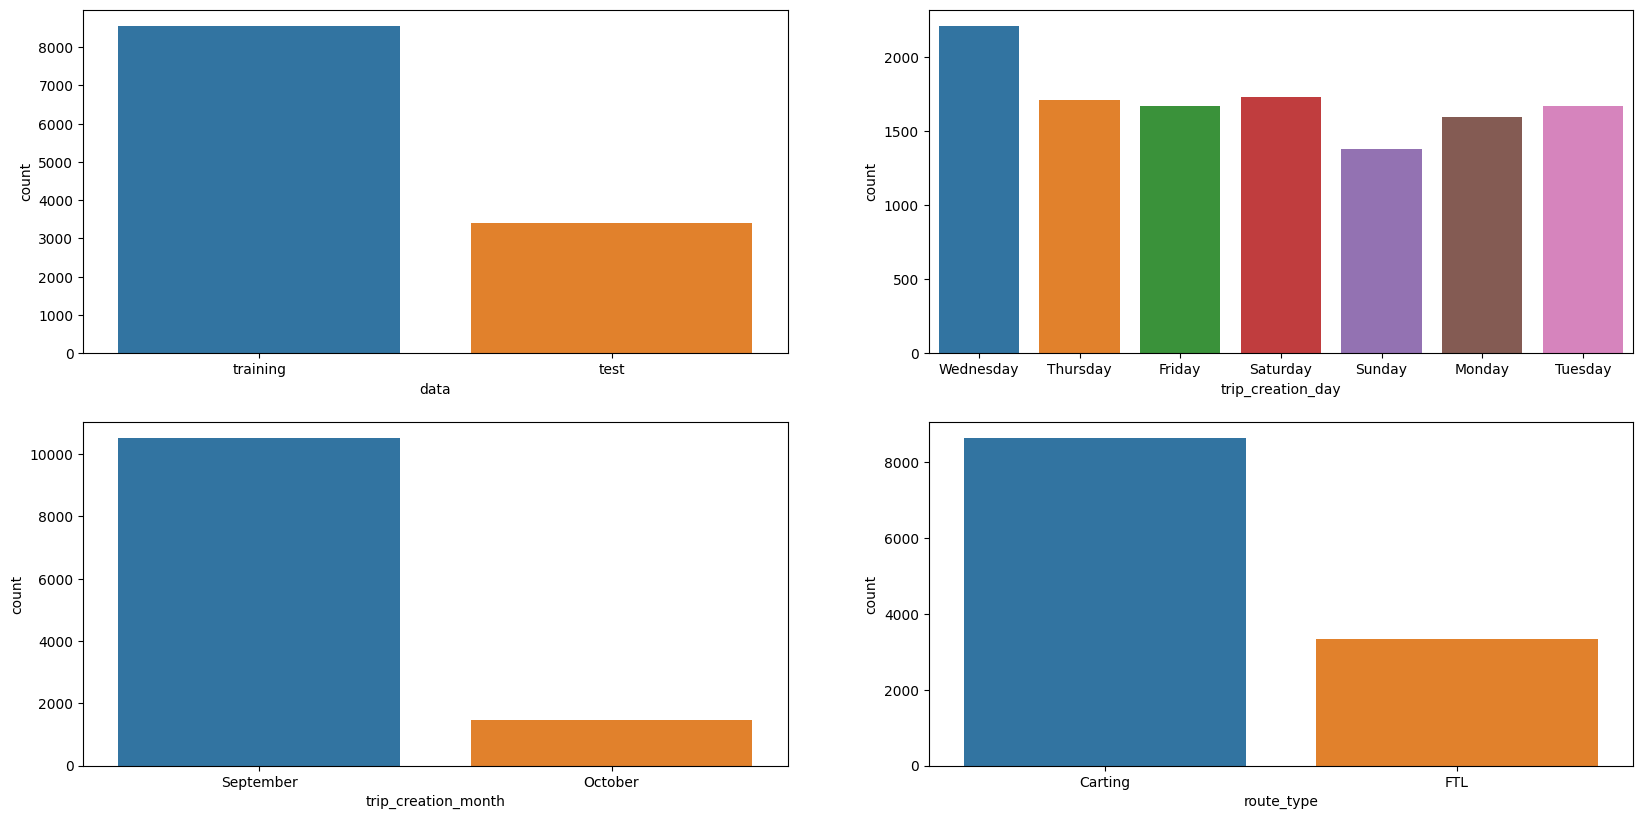

data
test        3415
training    8556
Name: trip_uuid, dtype: int64

trip_creation_day
Friday       1669
Monday       1594
Saturday     1731
Sunday       1384
Thursday     1709
Tuesday      1671
Wednesday    2213
Name: trip_uuid, dtype: int64

trip_creation_month
October       1464
September    10507
Name: trip_uuid, dtype: int64

route_type
Carting    8628
FTL        3343
Name: trip_uuid, dtype: int64



In [ ]:

cols=["data", "trip_creation_day", "trip_creation_month", "route_type"]
f,a=plt.subplots(nrows=2, ncols=2, figsize=(20,4))
i=0
f.subplots_adjust(top=2)
for row in range(2):
  for col in range(2):
    san.countplot(data=df1_tripWise, x=cols[i],ax=a[row,col])
    plt.xlabel(cols[i])
    i+=1
plt.show()
i=0
for row in range(2):
  for col in range(2):
    print(df1_tripWise.groupby(cols[i])['trip_uuid'].nunique())
    print()
    i+=1


Insight:
1. There are more training data than text.
2. On Wednesday more trips were created.
3. Dataset is from 12th sep to 3 oct so the chart shows more trips in sep than oct.
4. Convenient route carting was choosen rather than full load Truck.

Insight : There are total 14817 trips which is the primary key and route is segmented from source address to destination address. In every segment destination of last address would be source of the next.

**Checking relationship between agregated fields**

**Bivariate analysis:**
**Comparision and visualization of time and distance field**

Text(0.5, 1.0, 'relation between segment osrm time and segment osrm distance')

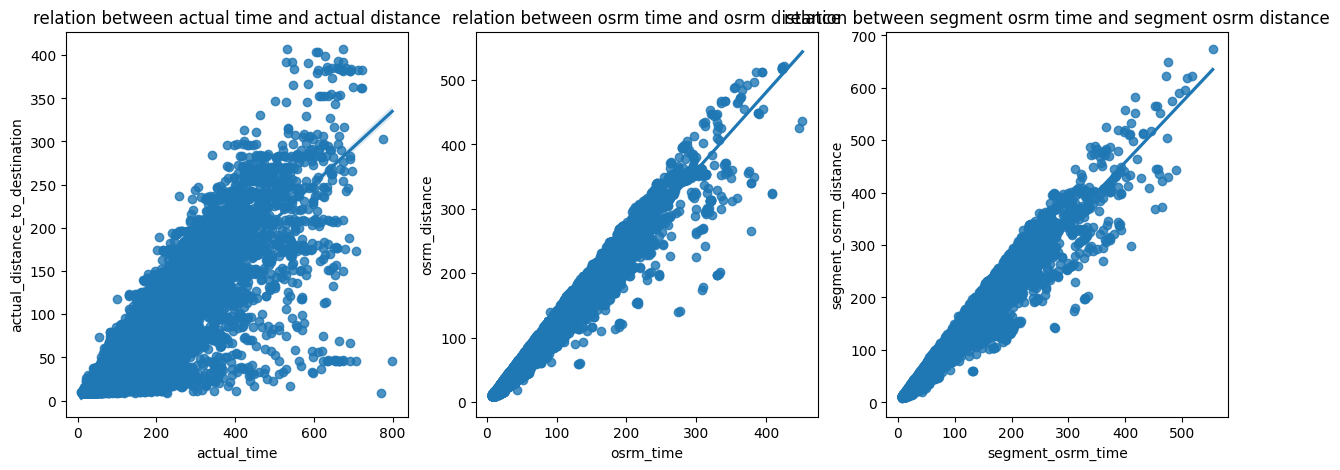

In [ ]:

f, a=plt.subplots(1,3,figsize=(15,5))
san.regplot(data=df1_tripWise,x='actual_time', y='actual_distance_to_destination', ax=a[0])
a[0].set_title('relation between actual time and actual distance' )
san.regplot(data=df1_tripWise, x='osrm_time', y='osrm_distance', ax=a[1])
a[1].set_title('relation between osrm time and osrm distance' )
san.regplot(data=df1_tripWise, x='segment_osrm_time',y='segment_osrm_distance', ax=a[2])
a[2].set_title('relation between segment osrm time and segment osrm distance' )


Insight: There are linear relationship between time and distance in each case.

but actual time has variable impact on actual distance covered.
and osrm distance has less vulnuarable with respect to time

<ipython-input-175-900ff688fa6d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  san.heatmap(df1_tripWise.corr(), annot=True)


<Axes: >

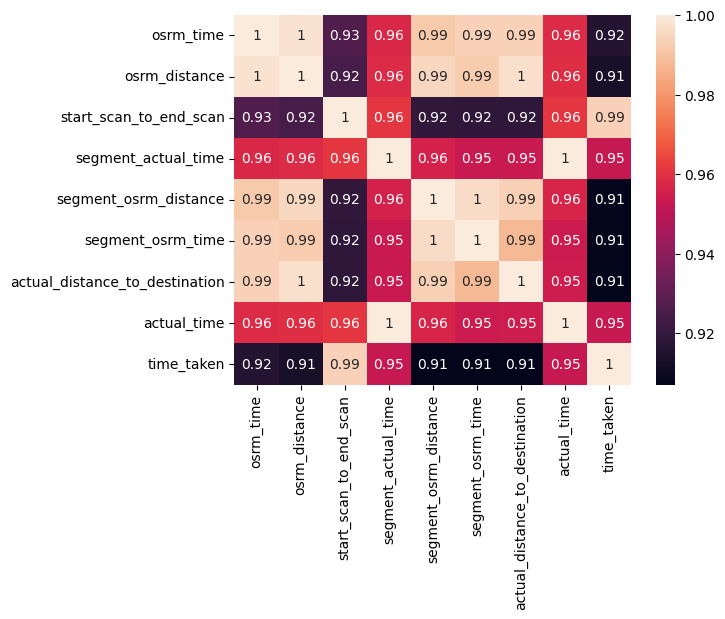

In [ ]:
san.heatmap(df1_tripWise.corr(), annot=True)

Insight: They are very highly correlated to each other as the value is from 1 to 0.9.

Hypothesis testing:
Compare the difference between time taken by ie od_start and od_end and start_scan_to_end_scan. **bold text**
1. create individual dataset time_taken and start_scan_to_end_scan by grouping data based on trip_uuid.
2. visualize the normality

Visualization of time _taken and start_scan_to_end_scan 


<Axes: xlabel='start_scan_to_end_scan', ylabel='Count'>

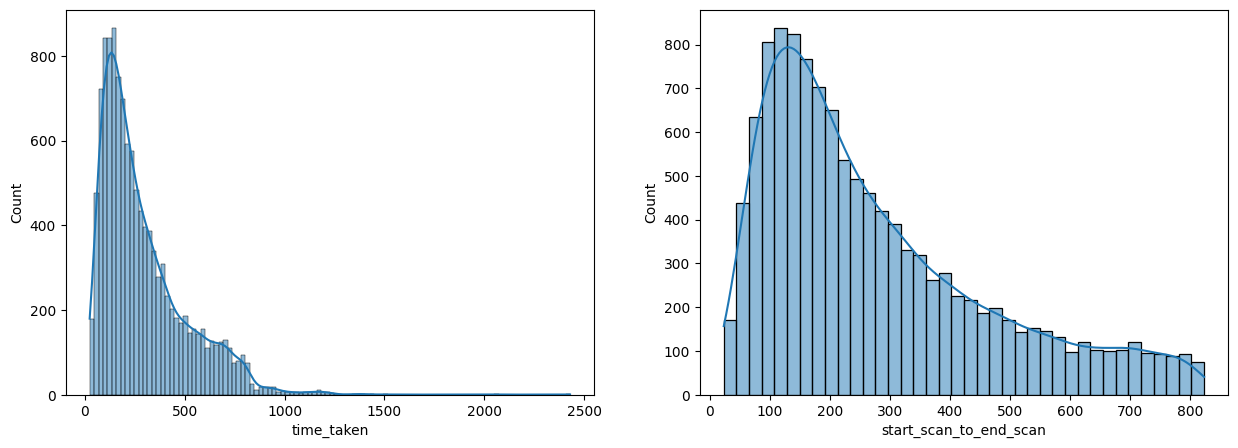

In [ ]:
print("Visualization of time _taken and start_scan_to_end_scan ")
plt.figure(figsize=(15,5))
plt.subplot(121)
san.histplot(df1_tripWise['time_taken'], kde=True)
plt.subplot(122)
san.histplot(df1_tripWise["start_scan_to_end_scan"], kde=True)


Insight:
1. Both are right skewed. Seems no significant difference between their means
so Hypothesis is


A t_test is used to compare the means of two samples.

The assumption for the ttest is that both groups are sampled from normal distributions with equal variance.So

1. check for variance(standard deviation)
2. check for normality
3. As we see
 where null hypothesis means that the difference in group means is zero or statsticaly insignificant and alternate hypothesis means the difference in means are statistically significant.


**Check for Normalisation:**

 Hyposthesis testing Compare time taken betweenn trip start and end and start and end scan tim
Ho: Mean of time taken betweenn trip start and end = Mean of start and end scan time
Ha: Mean of time taken betweenn trip start and end != Mean of start and end scan time 

Mean and standard deviation of time taken betweenn trip start and end
Mean :  289.3004196246275
Standard deviation :  210.69588856695094
Mean of start and end scan time
Mean :  276.2120123632111
Standard deviation :  188.82736585204415

 Check wether distriburtions are normal or not 


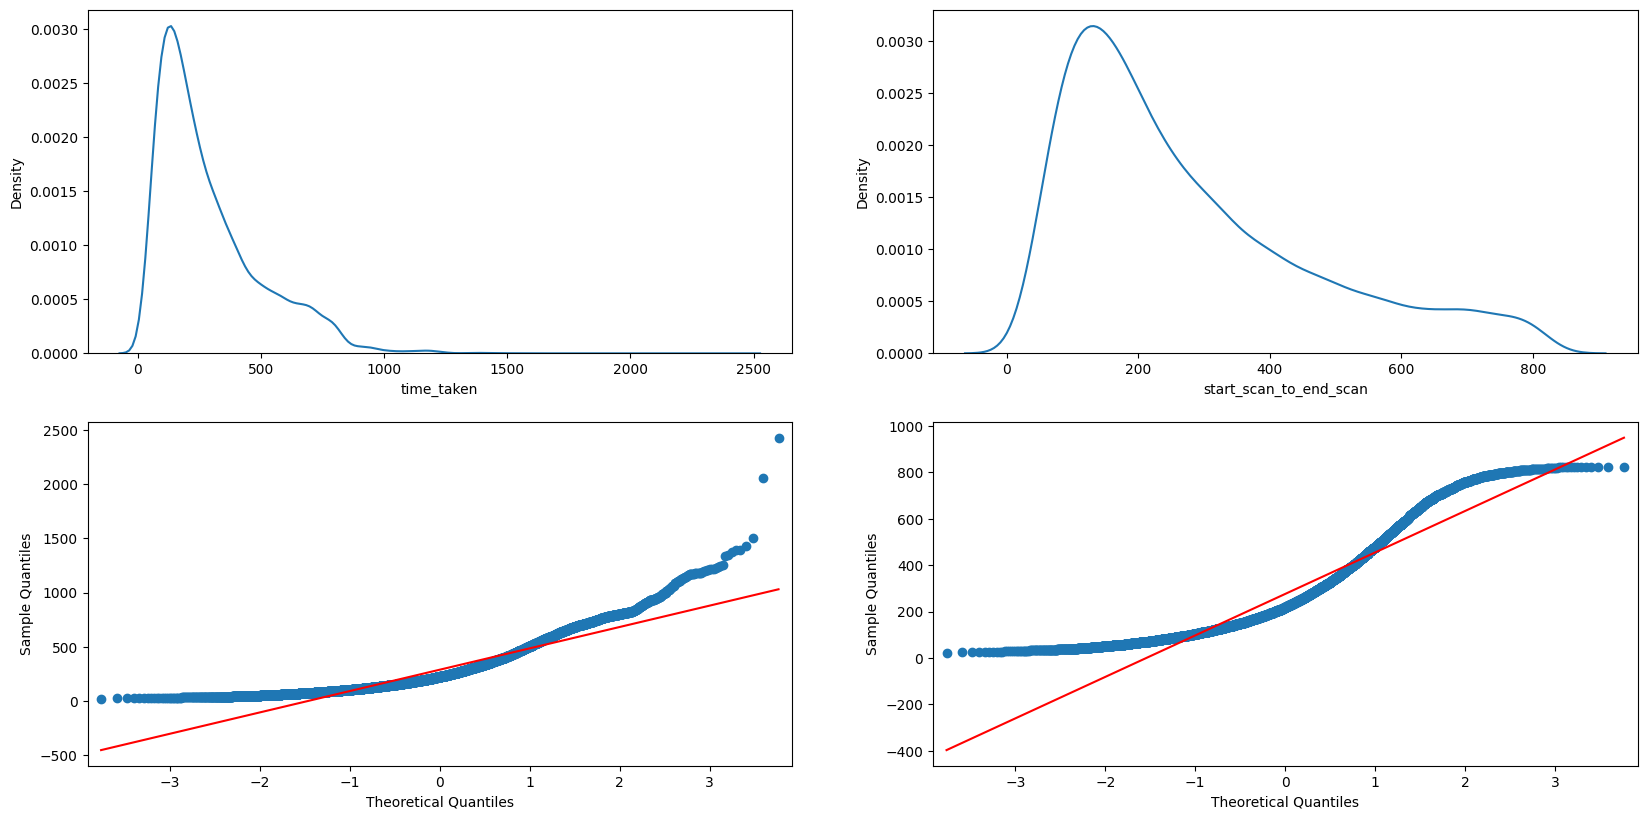

In [ ]:

print(" Hyposthesis testing Compare time taken betweenn trip start and end and start and end scan tim")
print('Ho: Mean of time taken betweenn trip start and end = Mean of start and end scan time')
print('Ha: Mean of time taken betweenn trip start and end != Mean of start and end scan time \n')

print("Mean and standard deviation of time taken betweenn trip start and end")
print("Mean : ", df1_tripWise['time_taken'].mean())
print("Standard deviation : ",df1_tripWise['time_taken'].std() )

print("Mean of start and end scan time")
print("Mean : ", df1_tripWise['start_scan_to_end_scan'].mean())
print("Standard deviation : ",df1_tripWise['start_scan_to_end_scan'].std() )
print()

print(" Check wether distriburtions are normal or not ")
f,ax=plt.subplots(nrows=2, ncols=2, figsize=(20,4))
f.subplots_adjust(top=2)
san.kdeplot(df1_tripWise['time_taken'],ax=ax[0][0] )
san.kdeplot(df1_tripWise['start_scan_to_end_scan'],ax=ax[0][1])

qqplot(df1_tripWise['time_taken'], line='r',ax=ax[1][0])
qqplot(df1_tripWise['start_scan_to_end_scan'], line='r',ax=ax[1][1])
plt.show()


Insight:
1. Visualization of data  by kde plot shows that the variance of distribution is same
2. Visualization of distribution through QQPlot shows that the distribution is not normal instead shows right skewed distribution.

Recomendation:
So standardization and Normalization of data is required


**Standardization/Normalization of data**

In [ ]:
set2=df1_tripWise[['time_taken','start_scan_to_end_scan']]
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(set2)
scaled_df=pd.DataFrame(scaled_data, columns=set2.columns)
print(scaled_df.head())



   time_taken  start_scan_to_end_scan
0    0.065732                0.196005
1    0.032018                0.096130
2    0.288817                0.866417
3    0.069421                0.207241
4    0.030983                0.093633


Insight: Data still visually dosnt seems normal because of a number of outliers.

Recomendation:
1. ttest will perform to check differences in means
2. To confirm it, i will do kstest to get statistically signified data on  standardized data

In [ ]:

print('ttest for checking statistically significance difference in means')
ttest_stat, p_value=ttest_ind(scaled_data[:,0], scaled_data[:,1])
print("ttest Stat value : ",ttest_stat )
print("pValue of ttest : ", p_value)
print()
print("The alpha value is 0.05 for 95% confidence level")
alpha=0.05
if p_value<0.05:
  print("Ho rejected")
  print("Mean of time taken betweenn trip start and end != Mean of start and end scan time")
else:
  print("Ho is fail to reject")
  print("Mean of time taken betweenn trip start and end = Mean of start and end scan time")

print()
print('kstest for checking statistically significance difference in means')

kstest_stat, ks_p_value=kstest(scaled_data[:,0], scaled_data[:,1])
print("kstest Stat value : ",kstest_stat )
print("pValue of kstest : ", ks_p_value)
print("To confirm the ttest we use kstest")
if p_value<0.05:
  print("Ho rejected")
  print("Mean of time taken betweenn trip start and end != Mean of start and end scan time")
else:
  print("Ho is fail to reject")
  print("Mean of time taken betweenn trip start and end = Mean of start and end scan time")


ttest for checking statistically significance difference in means
ttest Stat value :  -89.46366977891252
pValue of ttest :  0.0

The alpha value is 0.05 for 95% confidence level
Ho rejected
Mean of time taken betweenn trip start and end != Mean of start and end scan time

kstest for checking statistically significance difference in means
kstest Stat value :  0.4598613315512488
pValue of kstest :  0.0
To confirm the ttest we use kstest
Ho rejected
Mean of time taken betweenn trip start and end != Mean of start and end scan time


Insight: Mean of time taken from start to end is statically significance differ from start_scan_to_end_scan proved from ttest and kstest with 95% confidence.

**Hypothesis on differences in mean between actual_time aggregating value and OSRM time aggregated value:**

Visualization of time _taken and start_scan_to_end_scan 


<Axes: xlabel='osrm_time', ylabel='Count'>

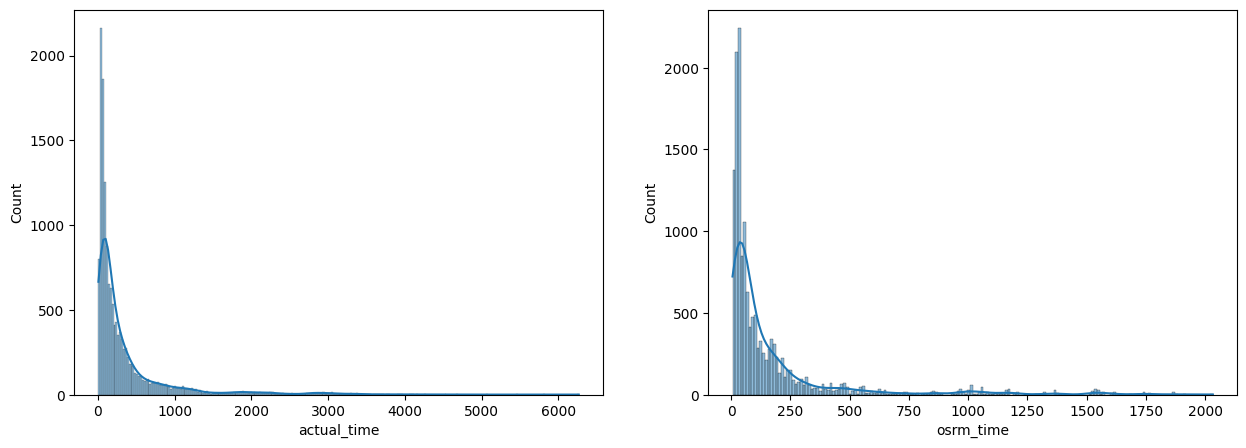

In [ ]:
print("Visualization of aggregated actual_time and aggregated osrm_time ")
plt.figure(figsize=(15,5))
plt.subplot(121)
san.histplot(df1_tripWise['actual_time'], kde=True)
plt.subplot(122)
san.histplot(df1_tripWise["osrm_time"], kde=True)

Insight:
1. Both are right skewed. Seems no significant difference between their means
so Hypothesis is


A t_test is used to compare the means of two samples.

The assumption for the ttest is that both groups are sampled from normal distributions with equal variance.So

1. check for variance(standard deviation)
2. check for normality
3. As we see
 where null hypothesis means that the difference in group means is zero or statsticaly insignificant and alternate hypothesis means the difference in means are statistically significant.

Checking of Normalization of distributiuon:

 Hyposthesis testing Compare actual_time aggregated value and OSRM time aggregated value
Ho: Mean of actual_time aggregated value  = Mean of OSRM time aggregated value
Ha: Mean of actual_time aggregated valu != Mean of OSRM time aggregated valuee 

Mean and standard deviation of actual_time aggregated value
Mean :  357.143753796315
Standard deviation :  561.3961566445056
Mean of OSRM time aggregated valuee
Mean :  162.07120199770534
Standard deviation :  272.3046330251734

 Check wether distriburtions are normal or not 


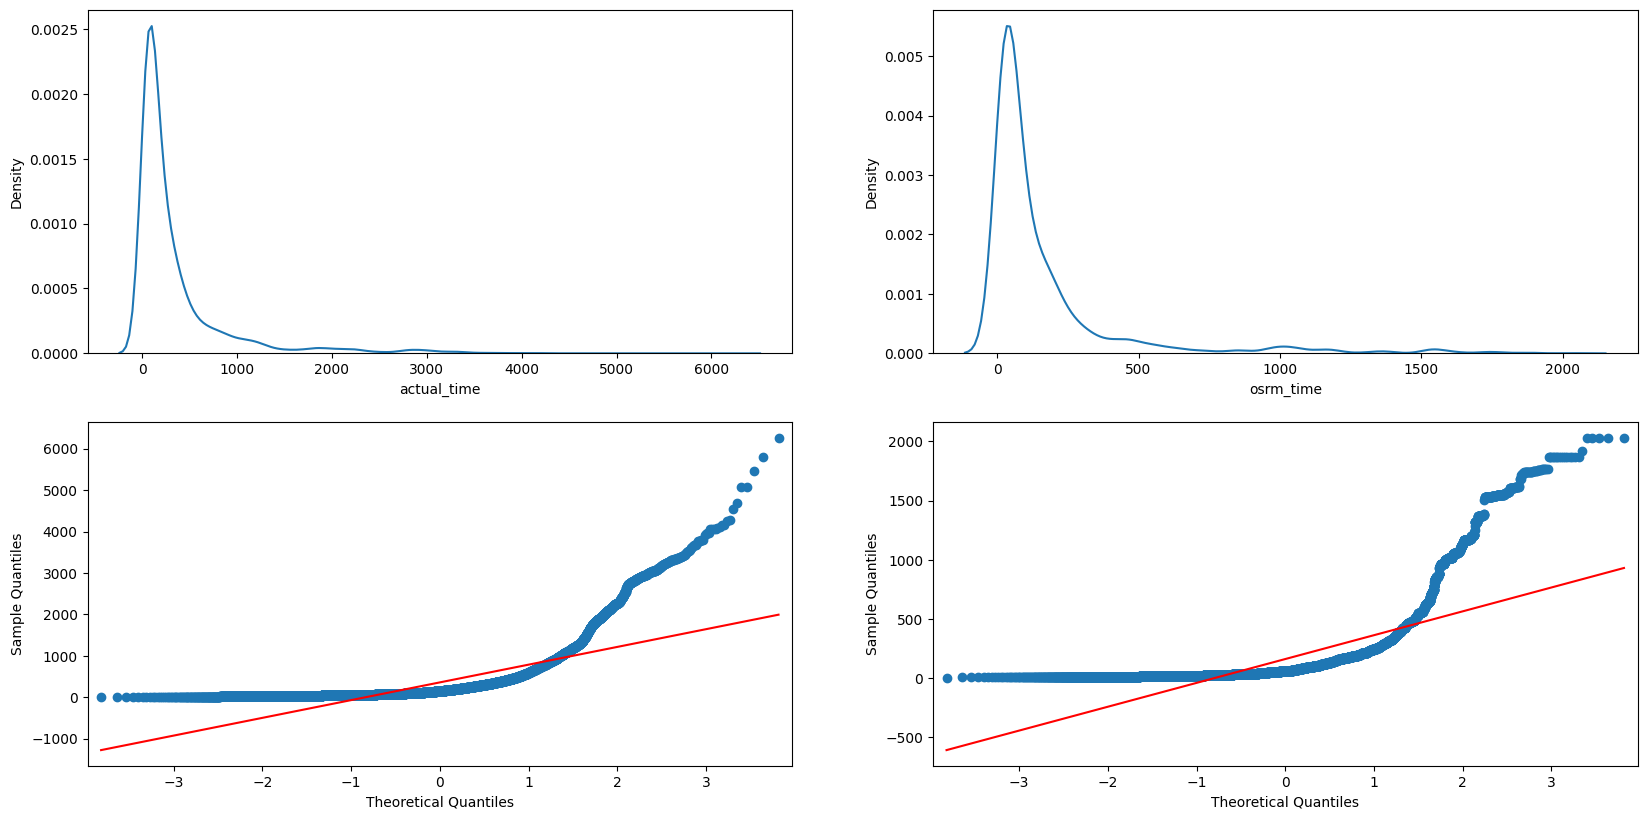

In [ ]:
print(" Hyposthesis testing Compare actual_time aggregated value and OSRM time aggregated value")
print('Ho: Mean of actual_time aggregated value  = Mean of OSRM time aggregated value')
print('Ha: Mean of actual_time aggregated valu != Mean of OSRM time aggregated valuee \n')

print("Mean and standard deviation of actual_time aggregated value")
print("Mean : ", df1_tripWise['actual_time'].mean())
print("Standard deviation : ",df1_tripWise['actual_time'].std() )

print("Mean of OSRM time aggregated valuee")
print("Mean : ", df1_tripWise['osrm_time'].mean())
print("Standard deviation : ",df1_tripWise['osrm_time'].std() )
print()

print(" Check wether distriburtions are normal or not ")
f,ax=plt.subplots(nrows=2, ncols=2, figsize=(20,4))
f.subplots_adjust(top=2)
san.kdeplot(df1_tripWise['actual_time'],ax=ax[0][0] )
san.kdeplot(df1_tripWise['osrm_time'],ax=ax[0][1])

qqplot(df1_tripWise['actual_time'], line='r',ax=ax[1][0])
qqplot(df1_tripWise['osrm_time'], line='r',ax=ax[1][1])
plt.show()


Insight:
1. Visualization of data  by kde plot shows that the variance of distribution is same
2. Visualization of distribution through QQPlot shows that the distribution is not normal instead shows right skwed distribution.

Recomendation:
So standardization and Normalization of data is required


In [ ]:
set3=df1_tripWise[['actual_time','osrm_time']]
scaler=MinMaxScaler()
scaled_data1=scaler.fit_transform(set3)
scaled_df1=pd.DataFrame(scaled_data, columns=set3.columns)
print(scaled_df1.head())

   actual_time  osrm_time
0     0.248242   0.363771
1     0.021419   0.030602
2     0.533568   0.856367
3     0.007992   0.004442
4     0.053069   0.054788


In [ ]:
print('ttest for checking statistically significance difference in means')
ttest_stat, p_value=ttest_ind(scaled_data1[:,0], scaled_data1[:,1])
print("ttest Stat value : ",ttest_stat )
print("pValue of ttest : ", p_value)
print()
print("The alpha value is 0.05 for 95% confidence level")
alpha=0.05
if p_value<0.05:
  print("Ho rejected")
  print(" Mean of actual_time aggregated value != Mean of OSRM time aggregated value")
else:
  print("Ho is fail to reject")
  print(" Mean of actual_time aggregated value  = Mean of OSRM time aggregated value")


print()
print('kstest for checking statistically significance difference in means')

kstest_stat, ks_p_value=kstest(scaled_data1[:,0], scaled_data1[:,1])
print("kstest Stat value : ",kstest_stat )
print("pValue of kstest : ", ks_p_value)
print("To confirm the ttest we use kstest")
if p_value<0.05:
  print("Ho rejected")
  print(" Mean of actual_time aggregated value  != Mean of OSRM time aggregated value")
else:
  print("Ho is fail to reject")
  print(" Mean of actual_time aggregated value  = Mean of OSRM time aggregated value")

ttest for checking statistically significance difference in means
ttest Stat value :  -16.107018232884304
pValue of ttest :  4.022759414319704e-58

The alpha value is 0.05 for 95% confidence level
Ho rejected
 Mean of actual_time aggregated value != Mean of OSRM time aggregated value

kstest for checking statistically significance difference in means
kstest Stat value :  0.0826078153472363
pValue of kstest :  2.0051539874580112e-44
To confirm the ttest we use kstest
Ho rejected
 Mean of actual_time aggregated value  != Mean of OSRM time aggregated value


Insight:Mean of actual_time aggregated value  != Mean of OSRM time aggregated value.

**Hypothesis on differences in mean between actual_time aggregating value and segment actual time aggregated value:**

Visualization of aggregated actual time and aggregated segment actual time value 


<Axes: xlabel='segment_actual_time', ylabel='Count'>

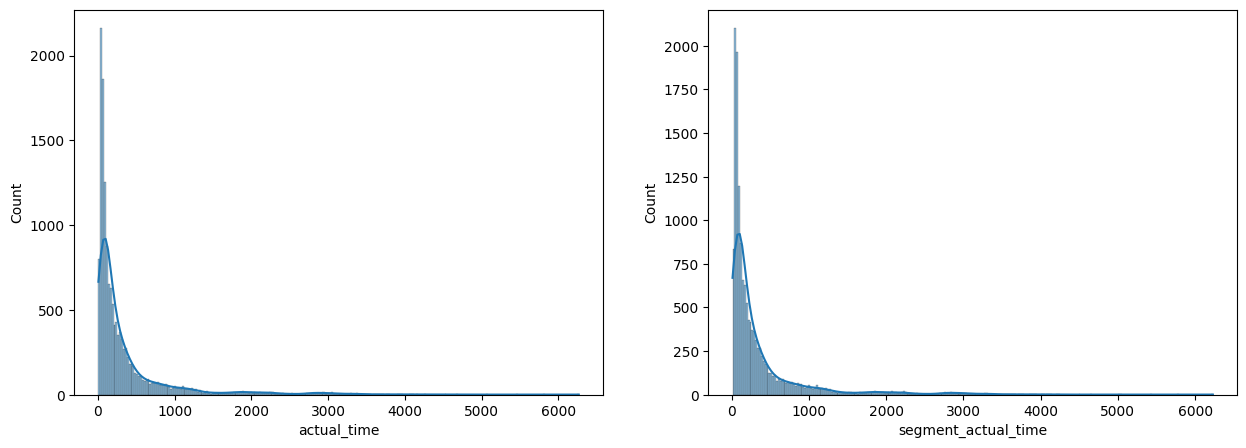

In [ ]:
print("Visualization of aggregated actual time and aggregated segment actual time value ")
plt.figure(figsize=(15,5))
plt.subplot(121)
san.histplot(df1_tripWise['actual_time'], kde=True)
plt.subplot(122)
san.histplot(df1_tripWise["segment_actual_time"], kde=True)

Insight:

Both are right skewed. Seems no significant difference between their means so Hypothesis is
A t_test is used to compare the means of two samples.

The assumption for the ttest is that both groups are sampled from normal distributions with equal variance.So

check for variance(standard deviation)
check for normality
As we see where null hypothesis means that the difference in group means is zero or statsticaly insignificant and alternate hypothesis means the difference in means are statistically significant.

Checking of Normalization of distributiuon:

 Hyposthesis testing Compare actual_time aggregated value and segment actual time aggregated value
Ho: Mean of actual_time aggregated value  = Mean of segment actual time aggregated value
Ha: Mean of actual_time aggregated valu != Mean of segment actual time aggregated valuee 

Mean and standard deviation of actual_time aggregated value
Mean :  357.143753796315
Standard deviation :  561.3961566445056
Mean ofsegment actual time aggregated valuee
Mean :  353.8922858878315
Standard deviation :  556.2479647891686

 Check wether distriburtions are normal or not 


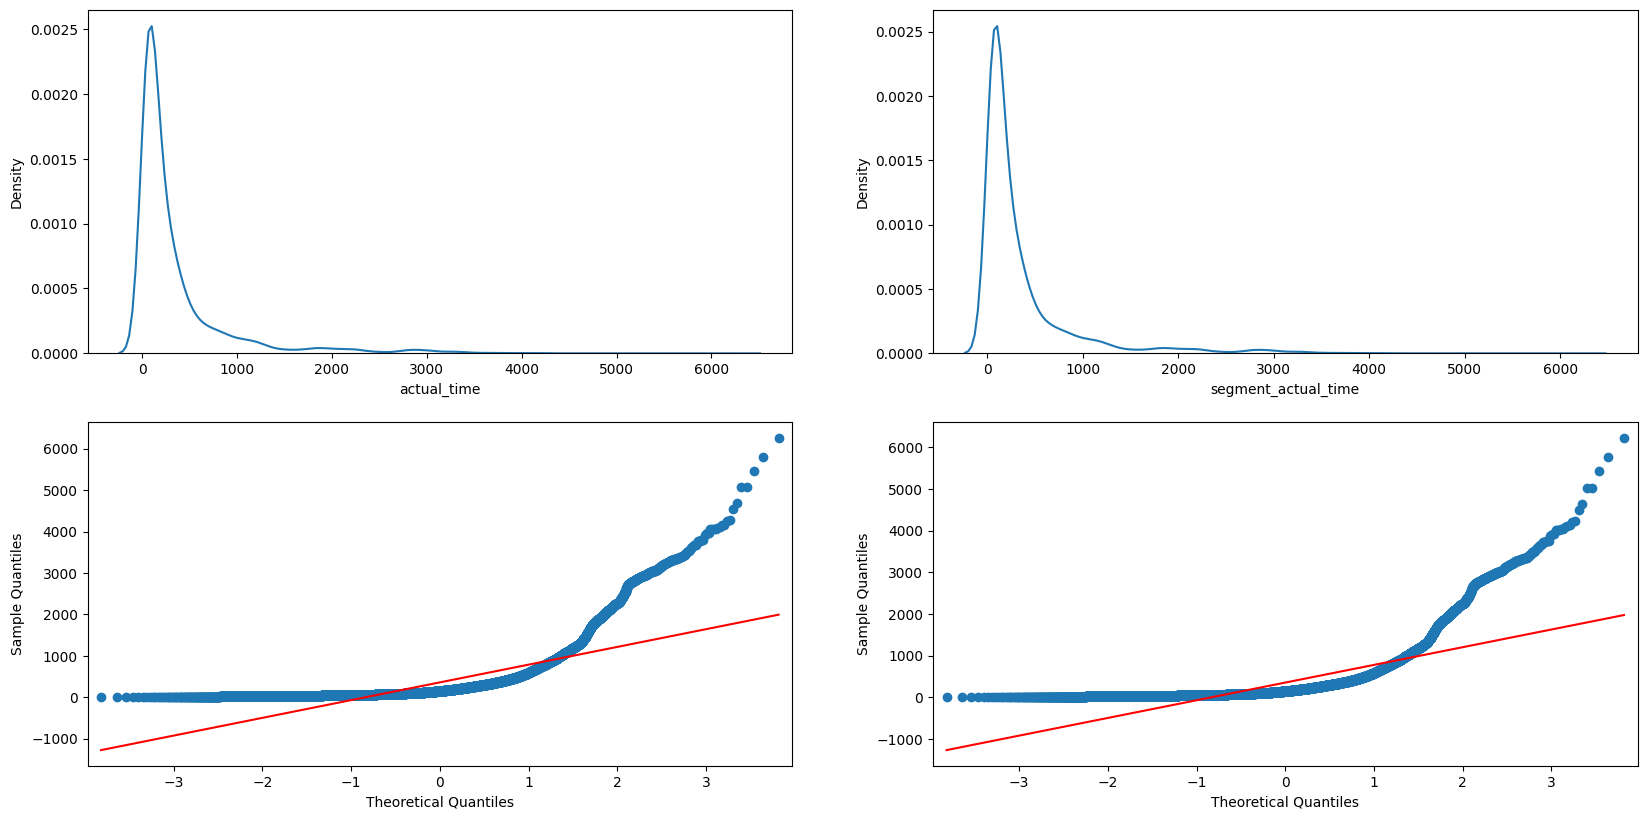

In [ ]:
print(" Hyposthesis testing Compare actual_time aggregated value and segment actual time aggregated value")
print('Ho: Mean of actual_time aggregated value  = Mean of segment actual time aggregated value')
print('Ha: Mean of actual_time aggregated valu != Mean of segment actual time aggregated valuee \n')

print("Mean and standard deviation of actual_time aggregated value")
print("Mean : ", df1_tripWise['actual_time'].mean())
print("Standard deviation : ",df1_tripWise['actual_time'].std() )

print("Mean ofsegment actual time aggregated valuee")
print("Mean : ", df1_tripWise['segment_actual_time'].mean())
print("Standard deviation : ",df1_tripWise['segment_actual_time'].std() )
print()

print(" Check wether distriburtions are normal or not ")
f,ax=plt.subplots(nrows=2, ncols=2, figsize=(20,4))
f.subplots_adjust(top=2)
san.kdeplot(df1_tripWise['actual_time'],ax=ax[0][0] )
san.kdeplot(df1_tripWise['segment_actual_time'],ax=ax[0][1])

qqplot(df1_tripWise['actual_time'], line='r',ax=ax[1][0])
qqplot(df1_tripWise['segment_actual_time'], line='r',ax=ax[1][1])
plt.show()


Insight:

Visualization of data by kde plot shows that the variance of distribution is same
Visualization of distribution through QQPlot shows that the distribution is not normal instead shows right skwed distribution.
Recomendation: So standardization and Normalization of data is required

Column Normalization/Standardization

In [ ]:
set4=df1_tripWise[['actual_time','segment_actual_time']]
scaler=MinMaxScaler()
scaled_data2=scaler.fit_transform(set4)
scaled_df2=pd.DataFrame(scaled_data, columns=set4.columns)
print(scaled_df2.head())

   actual_time  segment_actual_time
0     0.248242             0.363771
1     0.021419             0.030602
2     0.533568             0.856367
3     0.007992             0.004442
4     0.053069             0.054788


In [ ]:
print('ttest for checking statistically significance difference in means')
ttest_stat, p_value=ttest_ind(scaled_data2[:,0], scaled_data2[:,1])
print("ttest Stat value : ",ttest_stat )
print("pValue of ttest : ", p_value)
print()
print("The alpha value is 0.05 for 95% confidence level")
alpha=0.05
if p_value<0.05:
  print("Ho rejected")
  print("Mean of actual_time aggregated value  != Mean of segment actual time aggregated value")
else:
  print("Ho is fail to reject")
  print(" Mean of actual_time aggregated value  = Mean of segment actual time aggregated value")


print()
print('kstest for checking statistically significance difference in means')

kstest_stat, ks_p_value=kstest(scaled_data2[:,0], scaled_data2[:,1])
print("kstest Stat value : ",kstest_stat )
print("pValue of kstest : ", ks_p_value)
print("To confirm the ttest we use kstest")
if p_value<0.05:
  print("Ho rejected")
  print(" Mean of actual_time aggregated value  != Mean of segment actual time aggregated value")
else:
  print("Ho is fail to reject")
  print(" Mean of actual_time aggregated value  = Mean of segment actual time aggregated value")

ttest for checking statistically significance difference in means
ttest Stat value :  0.2013731812001071
pValue of ttest :  0.8404081661847658

The alpha value is 0.05 for 95% confidence level
Ho is fail to reject
 Mean of actual_time aggregated value  = Mean of segment actual time aggregated value

kstest for checking statistically significance difference in means
kstest Stat value :  0.006344064250523029
pValue of kstest :  0.9248583909392553
To confirm the ttest we use kstest
Ho is fail to reject
 Mean of actual_time aggregated value  = Mean of segment actual time aggregated value


Insight: Mean of actual_time aggregated value  = Mean of segment actual time aggregated value

**Hypothesis on differences in mean between osrm distance aggregating value and segment osrm distance aggregated value:**

Visualization of aggregated osrm distance and aggregated segment osrm distance value 


<Axes: xlabel='segment_osrm_distance', ylabel='Count'>

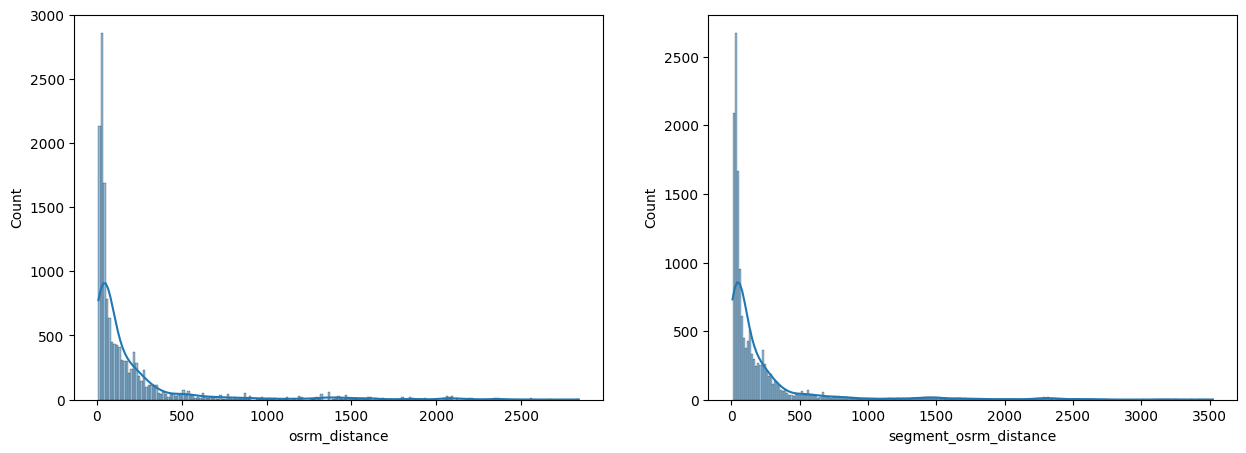

In [ ]:
print("Visualization of aggregated osrm distance and aggregated segment osrm distance value ")
plt.figure(figsize=(15,5))
plt.subplot(121)
san.histplot(df1_tripWise['osrm_distance'], kde=True)
plt.subplot(122)
san.histplot(df1_tripWise["segment_osrm_distance"], kde=True)

Insight:

Both are right skewed. Seems no significant difference between their means so Hypothesis is A t_test is used to compare the means of two samples.

The assumption for the ttest is that both groups are sampled from normal distributions with equal variance.So

check for variance(standard deviation) check for normality As we see where null hypothesis means that the difference in group means is zero or statsticaly insignificant and alternate hypothesis means the difference in means are statistically significant.

 Hyposthesis testing Compare osrm_distance aggregated value and segment osrm distance aggregated value
Ho: Mean of osrm distance aggregated value  = Mean of segment osrm distance aggregated value
Ha: Mean of osrm distance aggregated valu != Mean of segmentosrm distance aggregated valuee 

Mean and standard deviation of osrm distance aggregated value
Mean :  205.1013574880205
Standard deviation :  370.78001004515835
Mean ofsegment osrm distance aggregated valuee
Mean :  223.20116128771005
Standard deviation :  416.62837429074216

 Check wether distriburtions are normal or not 


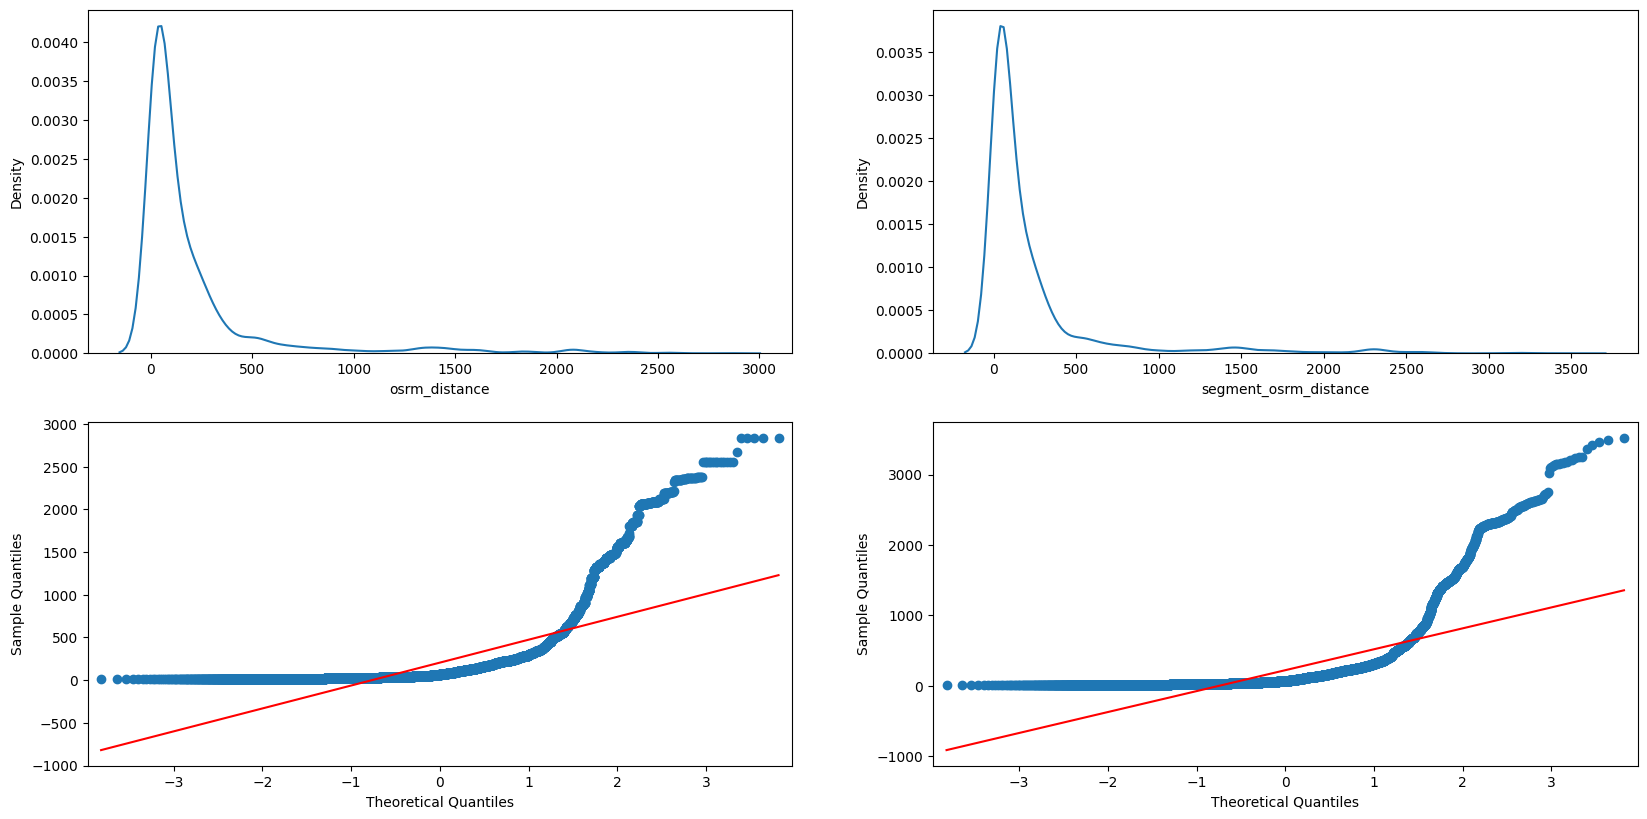

In [ ]:
print(" Hyposthesis testing Compare osrm_distance aggregated value and segment osrm distance aggregated value")
print('Ho: Mean of osrm distance aggregated value  = Mean of segment osrm distance aggregated value')
print('Ha: Mean of osrm distance aggregated valu != Mean of segmentosrm distance aggregated valuee \n')

print("Mean and standard deviation of osrm distance aggregated value")
print("Mean : ", df1_tripWise['osrm_distance'].mean())
print("Standard deviation : ",df1_tripWise['osrm_distance'].std() )

print("Mean ofsegment osrm distance aggregated valuee")
print("Mean : ", df1_tripWise['segment_osrm_distance'].mean())
print("Standard deviation : ",df1_tripWise['segment_osrm_distance'].std() )
print()

print(" Check wether distriburtions are normal or not ")
f,ax=plt.subplots(nrows=2, ncols=2, figsize=(20,4))
f.subplots_adjust(top=2)
san.kdeplot(df1_tripWise['osrm_distance'],ax=ax[0][0] )
san.kdeplot(df1_tripWise['segment_osrm_distance'],ax=ax[0][1])

qqplot(df1_tripWise['osrm_distance'], line='r',ax=ax[1][0])
qqplot(df1_tripWise['segment_osrm_distance'], line='r',ax=ax[1][1])
plt.show()

Column Normalization/Standardization

In [ ]:
set5=df1_tripWise[['osrm_distance','segment_osrm_distance']]
scaler=MinMaxScaler()
scaled_data3=scaler.fit_transform(set5)
scaled_df3=pd.DataFrame(scaled_data, columns=set5.columns)
print(scaled_df3.head())

   osrm_distance  segment_osrm_distance
0       0.248242               0.363771
1       0.021419               0.030602
2       0.533568               0.856367
3       0.007992               0.004442
4       0.053069               0.054788


In [ ]:
print('ttest for checking statistically significance difference in means')
ttest_stat, p_value=ttest_ind(scaled_data3[:,0], scaled_data3[:,1])
print("ttest Stat value : ",ttest_stat )
print("pValue of ttest : ", p_value)
print()
print("The alpha value is 0.05 for 95% confidence level")
alpha=0.05
if p_value<0.05:
  print("Ho rejected")
  print("Mean of osrm distance aggregated value  != Mean of segment osrm distance aggregated value")
else:
  print("Ho is fail to reject")
  print("Mean of osrm distance aggregated value  = Mean of segment osrm distance aggregated value")


print()
print('kstest for checking statistically significance difference in means')

kstest_stat, ks_p_value=kstest(scaled_data3[:,0], scaled_data3[:,1])
print("kstest Stat value : ",kstest_stat )
print("pValue of kstest : ", ks_p_value)
print("To confirm the ttest we use kstest")
if p_value<0.05:
  print("Ho rejected")
  print(" Mean of osrm distance aggregated value  != Mean of segment osrm distance aggregated value")
else:
  print("Ho is fail to reject")
  print(" Mean of osrm distance aggregated value  = Mean of segment osrm distance aggregated value")

ttest for checking statistically significance difference in means
ttest Stat value :  5.731160672060551
pValue of ttest :  1.00712196434009e-08

The alpha value is 0.05 for 95% confidence level
Ho rejected
Mean of osrm distance aggregated value  != Mean of segment osrm distance aggregated value

kstest for checking statistically significance difference in means
kstest Stat value :  0.05129243436593112
pValue of kstest :  2.229106709540961e-17
To confirm the ttest we use kstest
Ho rejected
 Mean of osrm distance aggregated value  != Mean of segment osrm distance aggregated value


Insight: Mean of osrm distance aggregated value  != Mean of segment osrm distance aggregated value.

**Hypothesis on differences in mean between osrm time aggregating value and segment osrm time aggregated value:**

Visualization of aggregated osrm distance and aggregated segment osrm distance value 


<Axes: xlabel='segment_osrm_distance', ylabel='Count'>

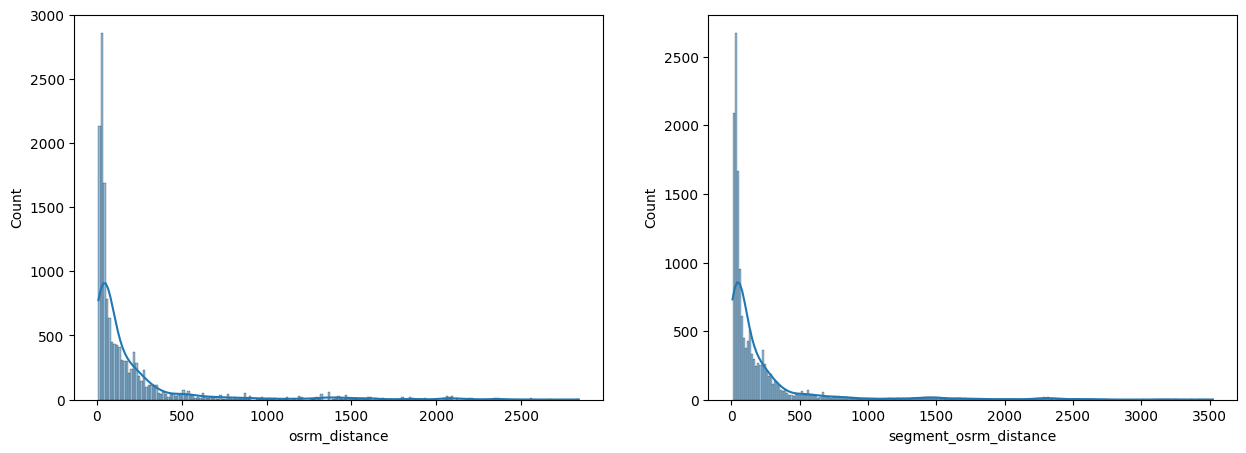

In [ ]:
print("Visualization of aggregated osrm distance and aggregated segment osrm distance value ")
plt.figure(figsize=(15,5))
plt.subplot(121)
san.histplot(df1_tripWise['osrm_distance'], kde=True)
plt.subplot(122)
san.histplot(df1_tripWise["segment_osrm_distance"], kde=True)

Insight:

Both are right skewed. Seems no significant difference between their means so Hypothesis is A t_test is used to compare the means of two samples.

The assumption for the ttest is that both groups are sampled from normal distributions with equal variance.So

check for variance(standard deviation) check for normality As we see where null hypothesis means that the difference in group means is zero or statsticaly insignificant and alternate hypothesis means the difference in means are statistically significant.

 Hyposthesis testing Compare osrm_time aggregated value and segment osrm time aggregated value
Ho: Mean of osrm time aggregated value  = Mean of segment osrm time aggregated value
Ha: Mean of osrm time aggregated valu != Mean of segmentosrmtime aggregated valuee 

Mean and standard deviation of osrm time aggregated value
Mean :  162.07120199770534
Standard deviation :  272.3046330251734
Mean ofsegment osrm time aggregated valuee
Mean :  180.94978740635756
Standard deviation :  314.5420465015801

 Check wether distriburtions are normal or not 


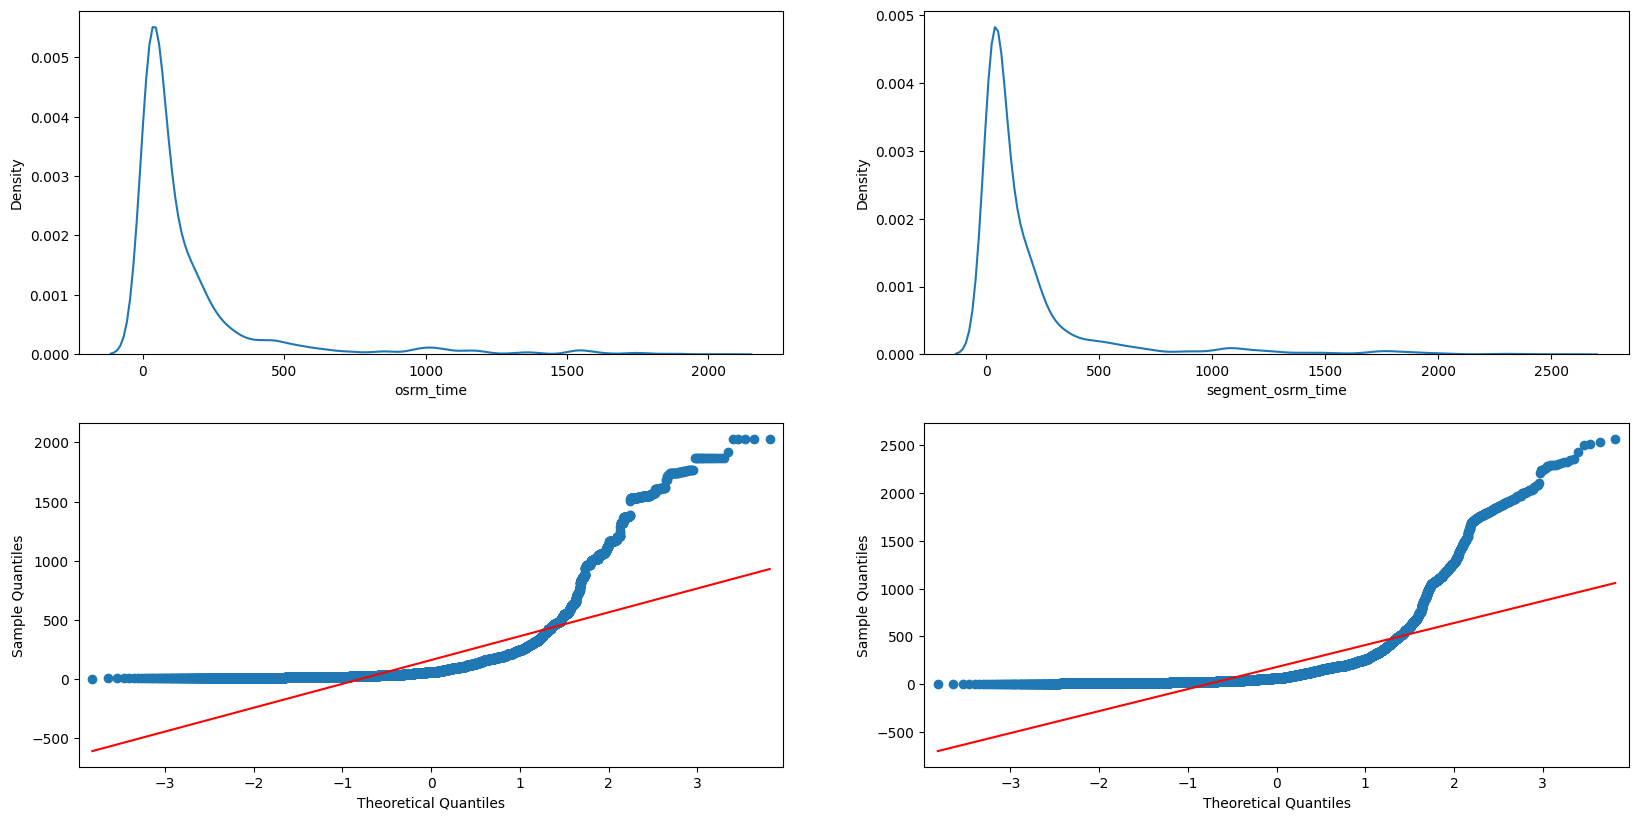

In [ ]:
print(" Hyposthesis testing Compare osrm_time aggregated value and segment osrm time aggregated value")
print('Ho: Mean of osrm time aggregated value  = Mean of segment osrm time aggregated value')
print('Ha: Mean of osrm time aggregated valu != Mean of segmentosrmtime aggregated valuee \n')

print("Mean and standard deviation of osrm time aggregated value")
print("Mean : ", df1_tripWise['osrm_time'].mean())
print("Standard deviation : ",df1_tripWise['osrm_time'].std() )

print("Mean ofsegment osrm time aggregated valuee")
print("Mean : ", df1_tripWise['segment_osrm_time'].mean())
print("Standard deviation : ",df1_tripWise['segment_osrm_time'].std() )
print()

print(" Check wether distriburtions are normal or not ")
f,ax=plt.subplots(nrows=2, ncols=2, figsize=(20,4))
f.subplots_adjust(top=2)
san.kdeplot(df1_tripWise['osrm_time'],ax=ax[0][0] )
san.kdeplot(df1_tripWise['segment_osrm_time'],ax=ax[0][1])

qqplot(df1_tripWise['osrm_time'], line='r',ax=ax[1][0])
qqplot(df1_tripWise['segment_osrm_time'], line='r',ax=ax[1][1])
plt.show()

Column Normalization/Standardization

In [ ]:
set6=df1_tripWise[['osrm_time','segment_osrm_time']]
scaler=MinMaxScaler()
scaled_data4=scaler.fit_transform(set6)
scaled_df4=pd.DataFrame(scaled_data, columns=set6.columns)
print(scaled_df4.head())

   osrm_time  segment_osrm_time
0   0.248242           0.363771
1   0.021419           0.030602
2   0.533568           0.856367
3   0.007992           0.004442
4   0.053069           0.054788


In [ ]:
print('ttest for checking statistically significance difference in means')
ttest_stat, p_value=ttest_ind(scaled_data3[:,0], scaled_data3[:,1])
print("ttest Stat value : ",ttest_stat )
print("pValue of ttest : ", p_value)
print()
print("The alpha value is 0.05 for 95% confidence level")
alpha=0.05
if p_value<0.05:
  print("Ho rejected")
  print("Mean of osrm time aggregated value  != Mean of segment osrm time aggregated value")
else:
  print("Ho is fail to reject")
  print("Mean of osrm time aggregated value  = Mean of segment osrm time aggregated valu")


print()
print('kstest for checking statistically significance difference in means')

kstest_stat, ks_p_value=kstest(scaled_data3[:,0], scaled_data3[:,1])
print("kstest Stat value : ",kstest_stat )
print("pValue of kstest : ", ks_p_value)
print("To confirm the ttest we use kstest")
if p_value<0.05:
  print("Ho rejected")
  print(" Mean of osrm time aggregated value  != Mean of segment osrm time aggregated value")
else:
  print("Ho is fail to reject")
  print(" Mean of osrm time aggregated value  = Mean of segment osrm time aggregated valu")

ttest for checking statistically significance difference in means
ttest Stat value :  5.731160672060551
pValue of ttest :  1.00712196434009e-08

The alpha value is 0.05 for 95% confidence level
Ho rejected
Mean of osrm time aggregated value  != Mean of segment osrm time aggregated value

kstest for checking statistically significance difference in means
kstest Stat value :  0.05129243436593112
pValue of kstest :  2.229106709540961e-17
To confirm the ttest we use kstest
Ho rejected
 Mean of osrm time aggregated value  != Mean of segment osrm time aggregated value


Insight: Mean of osrm time aggregated value  != Mean of segment osrm time aggregated value


In [ ]:
df1_tripWise.columns

Index(['trip_uuid', 'data', 'osrm_time', 'osrm_distance', 'trip_creation_time',
       'source_center', 'destination_center', 'source_name',
       'destination_name', 'route_schedule_uuid', 'route_type',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time',
       'actual_distance_to_destination', 'actual_time', 'source_city',
       'source_place', 'source_state', 'source_code', 'destination_city',
       'destination_place', 'destination_state', 'destination_code',
       'time_taken', 'source_city_state', 'destinaton_city_state',
       'source_ccs', 'destination_ccs'],
      dtype='object')

**Standarduzation and normalization of data**

In [ ]:
dataset=df1_tripWise[['osrm_time', 'osrm_distance', 'time_taken','start_scan_to_end_scan', 'segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time',
       'actual_distance_to_destination', 'actual_time', 'time_taken']]
scaler=MinMaxScaler()
scaled_dataset=scaler.fit_transform(dataset)
scaled_dataframe=pd.DataFrame(scaled_dataset, columns=dataset.columns)
print(scaled_dataframe.head())


   osrm_time  osrm_distance  time_taken  start_scan_to_end_scan  \
0   0.137079       0.148450    0.065732                0.196005   
1   0.017978       0.020708    0.032018                0.096130   
2   0.247191       0.268871    0.288817                0.866417   
3   0.035955       0.037078    0.069421                0.207241   
4   0.013483       0.005751    0.030983                0.093633   

   segment_actual_time  segment_osrm_distance  segment_osrm_time  \
0             0.167089               0.113023           0.106033   
1             0.063291               0.016256           0.016453   
2             0.418987               0.207217           0.197441   
3             0.064557               0.028576           0.029250   
4             0.018987               0.004432           0.010969   

   actual_distance_to_destination  actual_time  time_taken  
0                        0.161296     0.169620    0.065732  
1                        0.020538     0.063291    0.032018  
2    

**One hot encoding of categorical variables(route_type)**

In [ ]:
pd.get_dummies(df1_tripWise, columns=['route_type'])


,trip_uuid,data,osrm_time,osrm_distance,trip_creation_time,source_center,destination_center,source_name,destination_name,route_schedule_uuid,od_start_time,od_end_time,start_scan_to_end_scan,segment_actual_time,segment_osrm_distance,segment_osrm_time,actual_distance_to_destination,actual_time,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,743.0,991.3523,2018-09-12 00:00:16.535741,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1548.0,1320.4733,1008.0,824.732854,1562.0,0,1
1,trip-153671042288605164,training,68.0,85.1110,2018-09-12 00:00:22.886430,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,141.0,84.1894,65.0,73.186911,143.0,1,0
2,trip-153671043369099517,training,1741.0,2372.0852,2018-09-12 00:00:33.691250,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3308.0,2545.2678,1941.0,1932.273969,3347.0,0,1
3,trip-153671046011330457,training,15.0,19.6800,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,19.8766,16.0,17.175274,59.0,1,0
4,trip-153671052974046625,training,117.0,146.7918,2018-09-12 00:02:09.740725,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,340.0,146.7919,115.0,127.448500,341.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,62.0,73.4630,2018-10-03 23:55:56.258533,IND160002AAC,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,82.0,64.8551,62.0,57.762332,83.0,1,0
14813,trip-153861104386292051,test,12.0,16.0882,2018-10-03 23:57:23.863155,IND121004AAB,IND121004AAA,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,21.0,16.0883,11.0,15.513784,21.0,1,0
14814,trip-153861106442901555,test,54.0,63.2841,2018-10-03 23:57:44.429324,IND209304AAA,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,281.0,104.8866,88.0,38.684839,282.0,1,0
14815,trip-153861115439069069,test,184.0,177.6635,2018-10-03 23:59:14.390954,IND627005AAA,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,258.0,223.5324,221.0,134.723836,264.0,1,0


**Check from where most orders are coming from(State,corridor)**

In [ ]:
topstates = df1_tripWise.groupby('source_state')['trip_uuid'].nunique().sort_values(ascending=False).reset_index()
topstates

,source_state,trip_uuid
0,Maharashtra,2269
1,Karnataka,1923
2,Haryana,1300
3,Tamil Nadu,1015
4,Delhi,671
5,Gujarat,647
6,Telangana,585
7,Uttar Pradesh,542
8,West Bengal,521
9,Punjab,488


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(topstates, *['trip_uuid'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(topstates, *['trip_uuid'], **{})
chart

Insight: Maharashtra send maximum consighnment 2269, krnataka second highest  among all the 28 states.
Recommendation: More centers of Delhivery should set up for fast and reliable delivery as customer trust on the company.

**Top 10 Bussiest corridor:**

In [ ]:
df1_tripWise.columns

Index(['trip_uuid', 'data', 'osrm_time', 'osrm_distance', 'trip_creation_time',
       'source_center', 'destination_center', 'source_name',
       'destination_name', 'route_schedule_uuid', 'route_type',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time',
       'actual_distance_to_destination', 'actual_time', 'source_city',
       'source_place', 'source_state', 'source_code', 'destination_city',
       'destination_place', 'destination_state', 'destination_code',
       'time_taken', 'source_city_state', 'destinaton_city_state',
       'source_ccs', 'destination_ccs'],
      dtype='object')

In [ ]:
topcorridor = df1_tripWise.groupby('source_city_state')['trip_uuid'].nunique().sort_values(ascending=False).reset_index()
topcorridor.head(10)

,source_city_state,trip_uuid
0,Bengaluru Karnataka,1002
1,Gurgaon Haryana,723
2,Bhiwandi Maharashtra,609
3,Mumbai Maharashtra,578
4,Bangalore Karnataka,563
5,Delhi Delhi,498
6,Hyderabad Telangana,417
7,Pune Maharashtra,332
8,Chennai Tamil Nadu,316
9,Mumbai Hub (Maharashtra) Maharashtra,300


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['trip_uuid'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['trip_uuid'], **{})
chart

Insight: Bengaluru Karnataka is the busiest corridor with 1002 trip_uuid Gurgaon Hariyana is second most busiest corridor

Recommendation : More centers should deployed there as well as at least first in first 10 corridors ample number of staff shuld employed.

In [ ]:
busiest_route=df1_tripWise.groupby(["source_ccs","destination_ccs"]).agg({'trip_uuid':'count','actual_distance_to_destination': 'mean', 'actual_time':'mean'}).sort_values(by='trip_uuid', ascending=False).head(15).reset_index()

busiest_route.head(10)

,source_ccs,destination_ccs,trip_uuid,actual_distance_to_destination,actual_time
0,Bangalore 562132 Karnataka,Bengaluru 560300 Karnataka,151,28.031635,87.874172
1,Bengaluru 560099 Karnataka,Bengaluru 560300 Karnataka,121,41.727380,114.661157
2,Bengaluru 560300 Karnataka,Bangalore 562132 Karnataka,108,28.087494,105.231481
3,Ahmedabad 382430 Gujarat,Ahmedabad 382430 Gujarat,107,38.744631,123.747664
4,Bhiwandi 421302 Maharashtra,Mumbai Hub (Maharashtra) 400072 Hub Maharashtra,105,21.425833,61.285714
5,Mumbai 400072 Maharashtra,Bhiwandi 421302 Maharashtra,99,20.117543,80.868687
6,Chandigarh 160002 Punjab,Chandigarh 160002 Punjab,98,122.679259,288.948980
7,Bhiwandi 421302 Maharashtra,Bhiwandi 421302 Maharashtra,96,68.980259,220.510417
8,Bangalore 562132 Karnataka,Bengaluru 560099 Karnataka,96,39.529986,95.416667
9,Gurgaon 000000 Haryana,Sonipat 131028 Haryana,92,70.427926,216.456522


Insight: Bangalore 562132 Karnataka	 to Bengaluru 560300 Karnataka	and
1	Bengaluru 560099 Karnataka	 to Bengaluru 560300 Karnataka are the busiest route.

Recomendation : Adequate employee should assigned there. And more carting shuold manage in advanced to cope up with busy traffic.

**Inferrence and Recommendation**
1.   There are more training data than test. On Wednesday more trips were created, so part time employee should assign on wednesday and extra vehicle should arrange in advance.
2. Convenient route carting was choosen rather than full load Truck. so as the order grow more carting should arrange parmanetly.
3. There are linear relationship between time and distance in each case. but actual time has variable impact on actual distance covered.
and osrm distance has less vulnuarable with respect to time, so consideration should be on the base of actual or practical data not expected osrm and convey the time accordingly to custoimers.
4. According to hypothesis testing:
a. Mean of time taken from start to end is not statistically significance differ from start_scan_to_end_scan proved from ttest and kstest with 95% confidence.
Mean of actual_time aggregated value != Mean of OSRM time aggregated value.
b. Mean of actual_time aggregated value = Mean of segment actual time aggregated value
c. Mean of osrm distance aggregated value != Mean of segment osrm distance aggregated value.
d. Mean of osrm time aggregated value  != Mean of segment osrm time aggregated value

5. Bengaluru Karnataka is the busiest corridor with 1002 trip_uuid Gurgaon Hariyana is second most busiest corridor. So proper and more  stations should establish with adequate number of staff and delivery arrangement.
6. Bangalore 562132 Karnataka	 to Bengaluru 560300 Karnataka	and
1	Bengaluru 560099 Karnataka	 to Bengaluru 560300 Karnataka are the busiest route. Adequate employee should assigned there. And more carting shuold manage in advanced to cope up with busy traffic.
7. More centers should deployed there as well as at least first in first 10 corridors ample number of staff shuld employed.
8. Maharashtra send maximum consighnment 2269, krnataka second highest among all the 28 states. Recommendation: More centers of Delhivery should set up for fast and reliable delivery as customer trust on the company.




